# Modeling exercise

## General Instructions

* Submission date: 25.4.2022
* Submission Method: Link to your solution notebook in [this sheet](https://docs.google.com/spreadsheets/d/1fTmjiVxzw_rM1hdh16enwUTtxzlHSJIiw41dJS2LKp0/edit?usp=sharing).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
# import sys; sys.path.append('./src');
import numpy as np
import plotly_express as px

In [4]:
import pandas as pd
import ipywidgets as widgets
import math
import random
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from statistics import mean,pstdev

In [5]:
from src.datasets_ex import make_circles_dataframe, make_moons_dataframe, make_exercise_dataframe
from src.cross_validation import cross_validation

## Fitting and Overfiting 

The goal of the following exercise is to:
* Observe overfitting due to insuffient data
* Observe Overfitting due to overly complex model
* Identify the overfitting point by looking at Train vs Test error dynamic
* Observe how noise levels effect the needed data samples and model capacity

To do so, you'll code an experiment in the first part, and analyze the experiment result in the second part.

### Building an experiment

Code:

1. Create data of size N with noise level of magnitude NL from datasets DS_NAME. 
1. Split it to training and validation data (no need for test set), use 80%-20%. 
1. Use Logistic regression and Choose one complex model of your choice: [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [SVM with RBF kernel](https://scikit-learn.org/stable/modules/svm.html) with different `gamma` values or [Random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) with differnt number of `min_samples_split`. 
1. Train on the train set for different hyper parameter values. compute:
   1. Classification accuracy on the validation set (TRE)
   1. Classification accuracy on the validation set (TESTE)
   1. The difference beteen the two above (E_DIFF)
1. Save DS_NAME, N, NL, CLF_NAME, K, TRE, TESTE, E_DIFF and the regularization/hyper param (K, gamma or min_samples_split and regularization value for the linear regression classifier)

Repeat for:
* DS_NAME in Moons, Circles
* N (number of samples) in [5, 10, 50, 100, 1000, 10000]
* NL (noise level) in [0, 0.1, 0.2, 0.3, 0.4, 0.5]
* For the complex model: 10 Values of hyper parameter of the complex model you've chosen.
* For the linear model: 5 values of ridge (l2) regularization - [0.001, 0.01, 0.1, 1, 10, 100, 1000]

### Analysing the expermient results

1. For SVM only, For dataset of size 10k and for each dataset, What are the best model params? How stable is it? 
1. For SVM only, For dataset of size 10k and for each dataset, What is the most stable model and model params? How good is it in comparison to other models? Explain using bias and variance terminoligy.
1. Does regularization help for linear models? consider different datasets sizes. 
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? (answer for svm and LR seperatly)
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing model complexity? (answer for svm and LR seperatly)
1. Are the noise level effect the number of datapoints needed to reach optimal test results? 

Bonus:

* For SVM: Select one dataset and with 0.2 noise level. Identify the optimal model params, and visualize the decision boundry learned. 
  * Hint: Use a grid. See classification models notebook 

## Tips and Hints

For buliding the experiment:

* Start with one dataframe holding all the data for both datastes with different noise level. Use the `make_<dataset_name>_dataframe()` functions below, and add two columns, dataset_name and noise_level, before appending the new dataset to the rest of the datasets. Use `df = pd.DataFrame()` to start with an empty dataframe and using a loop, add data to it using `df = df.append(<the needed df here>)`. Verify that you have 10k samples for each dataset type and noise level by a proper `.value_counts()`. You can modify the 
* When you'll need an N samples data with a specific noise level, use `query()` and `head(n)` to get the needed dataset. 
* Use sklearn `train_test_split()` method to split the data with `test_size` and `random_state` parameters set correctly to ensure you are always splitting the data the same why for a given fold `k`. Read [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) if needed. 
* You can also not create your own data splitter, and instead use `model_selection.cross_validate()` from sklearn. You'll need to ask for the train erros as well as the test errors, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).
* Use prints in proper location to ensure the progress of the experiment. 

**If you get stuck, and need refernce, scroll to the end of the notebook to see more hints!**

## Moons dataset

In [6]:
from sklearn.datasets import make_moons

In [7]:
moons_df = make_moons_dataframe(n_samples=1000, noise_level=0.1)
moons_df.head()

x         y label
0  1.940740  0.132088     B
1  1.064831 -0.487917     B
2  1.521193 -0.444568     B
3  1.039759  0.343803     A
4 -0.029528  0.072974     B

In [8]:
@widgets.interact
def plot_noisy_moons(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    moons_df = make_moons_dataframe(n_samples=1000, noise_level=noise_level)
    return px.scatter(moons_df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Circles Dataset

In [9]:
circles_df = make_circles_dataframe(n_samples=10000, noise_level=0.3)
circles_df.head()

x         y label
0 -0.799138 -0.636770     A
1  0.267991 -0.749759     A
2  0.231185  0.318557     A
3 -1.265719 -0.013980     B
4  0.751179 -0.761937     A

In [10]:
@widgets.interact
def plot_noisy_circles(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    df = make_circles_dataframe(1000, noise_level)
    return px.scatter(df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Appendix

### More hints!

If you'll build the datasets dataframe correctly, you'll have **one** dataframe that has dataset_name and noise_level colmuns, as well as the regular x,y,label colmns. To unsure you've appended everything correctly, groupby the proper colmuns and look at the size:

In [11]:
dataset=make_exercise_dataframe()
dataset.groupby(['dataset_name','noise_level']).apply(lambda grp:grp.head())
# Use proper groupby statement to ensure the datasets dataframe contains data as expected. You should see the following result:


dataset_name  noise_level         x         y  \
dataset_name noise_level                                                        
circles      0.0         0           circles          0.0 -0.934329  0.356412   
                         1           circles          0.0  0.824956 -0.565197   
                         2           circles          0.0  0.988271  0.152710   
                         3           circles          0.0 -0.466263  0.884646   
                         4           circles          0.0 -0.799960  0.008042   
             0.1         10000       circles          0.1  0.404033 -0.715796   
                         10001       circles          0.1  0.919851  0.307212   
                         10002       circles          0.1  0.660158 -0.472990   
                         10003       circles          0.1 -0.909859 -0.250368   
                         10004       circles          0.1 -0.798762 -0.442221   
             0.2         20000       circles          0.2  0.403914  0.923551   
                         20001       circles          0.2  0.849489 -0.077910   
                         20002       circles          0.2 -0.189516  1.073055   
                         20003       circles          0.2 -0.216590 -0.846294   
                         20004       circles          0.2 -0.468061  0.561007   
             0.3         30000       circles          0.3  0.905740  0.421684   
                         30001       circles          0.3 -0.818763  0.034405   
                         30002       circles          0.3 -0.682099  0.449251   
                         30003       circles          0.3 -0.183328  1.126491   
                         30004       circles          0.3 -0.038251 -0.816255   
             0.4         40000       circles          0.4  1.138731 -0.294808   
                         40001       circles          0.4  0.077074  0.450010   
                         40002       circles          0.4 -1.458733 -1.387328   
                         40003       circles          0.4 -0.917003 -0.813708   
                         40004       circles          0.4  1.047815 -0.589534   
             0.5         50000       circles          0.5 -0.542454  1.267753   
                         50001       circles          0.5 -1.525160 -1.671895   
                         50002       circles          0.5 -0.548692 -0.360702   
                         50003       circles          0.5 -0.260376 -0.874193   
                         50004       circles          0.5 -0.069406 -0.917477   
moons        0.0         60000         moons          0.0  0.559841  0.828600   
                         60001         moons          0.0  1.995794  0.408376   
                         60002         moons          0.0  1.654558 -0.256011   
                         60003         moons          0.0  0.125870  0.014308   
                         60004         moons          0.0  0.974376  0.224927   
             0.1         70000         moons          0.1  0.222219  1.048333   
                         70001         moons          0.1  1.130526 -0.597632   
                         70002         moons          0.1  1.936335  0.031026   
                         70003         moons          0.1  1.524345 -0.562439   
                         70004         moons          0.1 -0.211449  1.030391   
             0.2         80000         moons          0.2 -1.042786  0.400983   
                         80001         moons          0.2  1.566790  0.010607   
                         80002         moons          0.2  1.022957 -0.668349   
                         80003         moons          0.2  0.697641 -0.466722   
                         80004         moons          0.2  1.752902 -0.137560   
             0.3         90000         moons          0.3 -0.795947  0.525034   
                         90001         moons          0.3  0.176306  0.812980   
                         90002         moons          0.3  1.32

You experiment code should look something like that:

In [21]:
dataset_type = ['circles', 'moons']
k_folds = 10
n_samples = [10,50, 100, 1000, 10000]
noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
clf_types = ['log_reg','svm']
regularization = [10**x for x in range (-3,4)]
C_range=[0.1,1,10]
gamma_range= [0.0001,0.001,0.01,0.1,1,2,5,10,25,50,100,250,500,1000]
results=[]

for ds_type in dataset_type:
    print(f'\nWorking on {ds_type}')
    for nl in noise_levels:
        for n in n_samples:
            ds = dataset.query('dataset_name==@ds_type & noise_level==@nl').head(n)  
            train_index=list(range(ds.shape[0]))
            x_train = ds.iloc[train_index,2:-1]
            y_train = ds.iloc[train_index,-1]
            for clf_type in clf_types:
                print(f'{k_folds}-fold CV for dataset: {ds_type} /w samples: {n:5} and noise level: {nl:3} classifiers: {clf_type}')
                if clf_type =="svm":
                    for C in C_range:
                        for gamma in gamma_range:
                            clf=SVC(kernel='rbf',C=C, gamma=gamma)
                            acc_train,std_train,acc_valid,std_valid=cross_validation(x_train,y_train,k_folds,clf)
                            acc_diff=round(acc_train-acc_valid,3)
                            results.append((ds_type,n,nl,clf_type,acc_train,std_train,acc_valid,std_valid,acc_diff,C,gamma))
                if clf_type =="log_reg":
                    for C in regularization:
                        clf = LogisticRegression(penalty='l2', C=C)
                        acc_train,std_train,acc_valid,std_valid=cross_validation(x_train,y_train,k_folds,clf)
                        acc_diff=round(acc_train-acc_valid,3)
                        results.append((ds_type,n,nl,clf_type,acc_train,std_train,acc_valid,std_valid,acc_diff,C,0))
                                                                    
df_results=pd.DataFrame(results, columns=['dataset','n_sample','noise_level','clf_type','acc_train','std_train','acc_valid','std_valid','acc_diff','C','gamma'])                    
# df_results.to_csv("./data_res/Modeling_Results.csv", index=False)


Working on circles
10-fold CV for dataset: circles /w samples:    10 and noise level:   0 classifiers: log_reg
10-fold CV for dataset: circles /w samples:    10 and noise level:   0 classifiers: svm
10-fold CV for dataset: circles /w samples:    50 and noise level:   0 classifiers: log_reg
10-fold CV for dataset: circles /w samples:    50 and noise level:   0 classifiers: svm
10-fold CV for dataset: circles /w samples:   100 and noise level:   0 classifiers: log_reg
10-fold CV for dataset: circles /w samples:   100 and noise level:   0 classifiers: svm
10-fold CV for dataset: circles /w samples:  1000 and noise level:   0 classifiers: log_reg
10-fold CV for dataset: circles /w samples:  1000 and noise level:   0 classifiers: svm
10-fold CV for dataset: circles /w samples: 10000 and noise level:   0 classifiers: log_reg
10-fold CV for dataset: circles /w samples: 10000 and noise level:   0 classifiers: svm
10-fold CV for dataset: circles /w samples:    10 and noise level: 0.1 classifie

In [12]:
df=pd.read_csv('./data_res/Modeling_Results.csv')

In [13]:
df.shape

(2940, 11)

In [14]:
df.columns

Index(['dataset', 'n_sample', 'noise_level', 'clf_type', 'acc_train',
       'std_train', 'acc_valid', 'std_valid', 'acc_diff', 'C', 'gamma'],
      dtype='object')

In [15]:
df1=df[df.dataset=='circles']
df2=df[df.dataset=='moons']
print(f'df1 Shape : {df1.shape}')
print(f'df2 Shape : {df2.shape}')

df1 Shape : (1470, 11)
df2 Shape : (1470, 11)


#### <b>(1) Best SVM classifier params for each dataset w/ 10k samples</b>

SVM Clasifier hyper parms w/ the highest accuracy on validation test for each dataset for sample size of 10K and for each noise level

##### <b>Circles dataset<b/>

Best SVM hyper params combination to get <b>maximum predicted accuracy</b> on validation set per each noise level.<br>


In [235]:
df1.query("clf_type=='svm' & n_sample==10000").groupby('noise_level').apply(lambda grp: grp[grp.acc_valid==grp.acc_valid.max()])

dataset  n_sample  noise_level clf_type  acc_train  \
noise_level                                                            
0.0         207   circles     10000          0.0      svm      1.000   
            208   circles     10000          0.0      svm      1.000   
            209   circles     10000          0.0      svm      1.000   
            210   circles     10000          0.0      svm      1.000   
            211   circles     10000          0.0      svm      1.000   
            212   circles     10000          0.0      svm      1.000   
            213   circles     10000          0.0      svm      1.000   
            214   circles     10000          0.0      svm      1.000   
            215   circles     10000          0.0      svm      1.000   
            216   circles     10000          0.0      svm      1.000   
            220   circles     10000          0.0      svm      1.000   
            221   circles     10000          0.0      svm      1.000   
            222   circles     10000          0.0      svm      1.000   
            223   circles     10000          0.0      svm      1.000   
            224   circles     10000          0.0      svm      1.000   
            225   circles     10000          0.0      svm      1.000   
            226   circles     10000          0.0      svm      1.000   
            227   circles     10000          0.0      svm      1.000   
            228   circles     10000          0.0      svm      1.000   
            229   circles     10000          0.0      svm      1.000   
            230   circles     10000          0.0      svm      1.000   
            233   circles     10000          0.0      svm      1.000   
            234   circles     10000          0.0      svm      1.000   
            235   circles     10000          0.0      svm      1.000   
            236   circles     10000          0.0      svm      1.000   
            237   circles     10000          0.0      svm      1.000   
            238   circles     10000          0.0      svm      1.000   
            239   circles     10000          0.0      svm      1.000   
            240   circles     10000          0.0      svm      1.000   
            241   circles     10000          0.0      svm      1.000   
            242   circles     10000          0.0      svm      1.000   
            243   circles     10000          0.0      svm      1.000   
            244   circles     10000          0.0      svm      1.000   
0.1         468   circles     10000          0.1      svm      0.845   
            469   circles     10000          0.1      svm      0.845   
            481   circles     10000          0.1      svm      0.844   
0.2         711   circles     10000          0.2      svm      0.691   
0.3         943   circles     10000          0.3      svm      0.637   
0.4         1216  circles     10000          0.4      svm      0.593   
0.5         1447  circles     10000          0.5      svm      0.583   
            1461  circles     10000          0.5      svm      0.583   

                  std_train  acc_valid  std_valid  acc_diff     C    gamma  
noise_level                                                                 
0.0         207       0.000      1.000      0.000     0.000   0.1     1.00  
            208       0.000      1.000      0.000     0.000   0.1     2.00  
            209       0.000      1.000      0.000     0.000   0.1     5.00  
            210       0.000      1.000      0.000     0.000   0.1    10.00  
            211       0.000      1.000      0.000     0.000   0.1    25.00  
            212       0.000      1.000      0.000     0.000   0.1    50.00  
            213       0.000      1.000      0.000     0.000   0.1   100.00  
            214       0.000      1.000      0.000     0.000   0.1   250.00  
            215       0.000      1.000      0.000     0.000   0.1   500.00  
            216       0.000      1.000      0.000     0.000   0.1  1000.00

 * Filler out the models w/ the lowest Train-Validation accuracy difference and the lowest standard deviation for final pick

In [117]:
df1.query("clf_type=='svm' & n_sample==10000").groupby('noise_level').apply(lambda grp: grp.sort_values(by=['acc_valid','acc_diff','std_valid'],ascending=[False,True,True]).head(1))

dataset  n_sample  noise_level clf_type  acc_train  \
noise_level                                                            
0.0         207   circles     10000          0.0      svm      1.000   
0.1         481   circles     10000          0.1      svm      0.844   
0.2         711   circles     10000          0.2      svm      0.691   
0.3         943   circles     10000          0.3      svm      0.637   
0.4         1216  circles     10000          0.4      svm      0.593   
0.5         1461  circles     10000          0.5      svm      0.583   

                  std_train  acc_valid  std_valid  acc_diff     C  gamma  
noise_level                                                               
0.0         207       0.000      1.000      0.000     0.000   0.1    1.0  
0.1         481       0.001      0.844      0.006     0.000  10.0    2.0  
0.2         711       0.002      0.690      0.020     0.001   1.0    1.0  
0.3         943       0.001      0.636      0.013     0.001   0.1    2.0  
0.4         1216      0.002      0.592      0.013     0.001  10.0    2.0  
0.5         1461      0.002      0.578      0.015     0.005  10.0    2.0

##### <b>Moons dataset</b>

Best SVM hyper params combination to get <b>maximum predicted accuracy</b> on validation set per each noise level.<br>


In [16]:
df2.query("clf_type=='svm' & n_sample==10000").groupby('noise_level').apply(lambda grp: grp[grp.acc_valid==grp.acc_valid.max()])

dataset  n_sample  noise_level clf_type  acc_train  \
noise_level                                                           
0.0         1677   moons     10000          0.0      svm      1.000   
            1678   moons     10000          0.0      svm      1.000   
            1679   moons     10000          0.0      svm      1.000   
            1680   moons     10000          0.0      svm      1.000   
            1681   moons     10000          0.0      svm      1.000   
            1682   moons     10000          0.0      svm      1.000   
            1683   moons     10000          0.0      svm      1.000   
            1684   moons     10000          0.0      svm      1.000   
            1685   moons     10000          0.0      svm      1.000   
            1686   moons     10000          0.0      svm      1.000   
            1690   moons     10000          0.0      svm      1.000   
            1691   moons     10000          0.0      svm      1.000   
            1692   moons     10000          0.0      svm      1.000   
            1693   moons     10000          0.0      svm      1.000   
            1694   moons     10000          0.0      svm      1.000   
            1695   moons     10000          0.0      svm      1.000   
            1696   moons     10000          0.0      svm      1.000   
            1697   moons     10000          0.0      svm      1.000   
            1698   moons     10000          0.0      svm      1.000   
            1699   moons     10000          0.0      svm      1.000   
            1700   moons     10000          0.0      svm      1.000   
            1704   moons     10000          0.0      svm      1.000   
            1705   moons     10000          0.0      svm      1.000   
            1706   moons     10000          0.0      svm      1.000   
            1707   moons     10000          0.0      svm      1.000   
            1708   moons     10000          0.0      svm      1.000   
            1709   moons     10000          0.0      svm      1.000   
            1710   moons     10000          0.0      svm      1.000   
            1711   moons     10000          0.0      svm      1.000   
            1712   moons     10000          0.0      svm      1.000   
            1713   moons     10000          0.0      svm      1.000   
            1714   moons     10000          0.0      svm      1.000   
0.1         1925   moons     10000          0.1      svm      1.000   
            1926   moons     10000          0.1      svm      1.000   
            1937   moons     10000          0.1      svm      1.000   
            1951   moons     10000          0.1      svm      1.000   
            1952   moons     10000          0.1      svm      1.000   
0.2         2195   moons     10000          0.2      svm      0.972   
0.3         2415   moons     10000          0.3      svm      0.915   
            2430   moons     10000          0.3      svm      0.917   
            2432   moons     10000          0.3      svm      0.921   
            2442   moons     10000          0.3      svm      0.915   
0.4         2661   moons     10000          0.4      svm      0.864   
            2662   moons     10000          0.4      svm      0.865   
            2674   moons     10000          0.4      svm      0.864   
            2676   moons     10000          0.4      svm      0.867   
            2687   moons     10000          0.4      svm      0.864   
            2688   moons     10000          0.4      svm      0.865   
0.5         2906   moons     10000          0.5      svm      0.828   
            2919   moons     10000          0.5      svm      0.828   
            2932   moons     10000          0.5      svm      0.827   

                  std_train  acc_valid  std_valid  acc_diff     C   gamma  
noise_level                                                                
0.0         1677      0.000      1.000      0.000     0.000   0.1     1.0  
            1678      0.0

 * Filler out the models w/ the lowest standard deviation for final pick

In [118]:
df2.query("clf_type=='svm' & n_sample==10000").groupby('noise_level').apply(lambda grp: grp.sort_values(by=['acc_valid','acc_diff','std_valid'],ascending=[False,True,True]).head(1))

dataset  n_sample  noise_level clf_type  acc_train  \
noise_level                                                           
0.0         1677   moons     10000          0.0      svm      1.000   
0.1         1951   moons     10000          0.1      svm      1.000   
0.2         2195   moons     10000          0.2      svm      0.972   
0.3         2442   moons     10000          0.3      svm      0.915   
0.4         2674   moons     10000          0.4      svm      0.864   
0.5         2932   moons     10000          0.5      svm      0.827   

                  std_train  acc_valid  std_valid  acc_diff     C  gamma  
noise_level                                                               
0.0         1677      0.000      1.000      0.000     0.000   0.1    1.0  
0.1         1951      0.000      1.000      0.000     0.000  10.0    2.0  
0.2         2195      0.001      0.972      0.004     0.000  10.0    1.0  
0.3         2442      0.001      0.915      0.007     0.000  10.0    5.0  
0.4         2674      0.001      0.863      0.010     0.001   1.0   10.0  
0.5         2932      0.001      0.825      0.011     0.002  10.0    5.0

Tuned SVM hyper params (C and gamma) that <b>maximize the predicted accuracy</b> on the validation set and <b>minimize the standard deviation</b> of that accuracy achieved for each noise level<br>
With the <b>noise level increases</b> predicted <b>accuracy</b> score on the validation set <b>decreases</b>.<br>
The <b>standard deviation</b> of the accuracy score tends to <b>increase</b> w/ higher noise level.</b><br>

When the classifiier tune for <b>maximum accuracy</b> the model has <b>higher variance and lower bais</b>

Circels : noise level [0-0.5] : Accuracy range [0.578-1]  std range [0-0.02]<br>
Moons   : noise level [0-0.5] : Acuuracy range [0.825-1]  std range [0-0.01]

#### <b>(2) Most stable SVM classifier params for each dataset w/ 10k samples</b>

##### <b>Circels dataset</b>

Best SVM hyper params combination to get <b>minimum standard deviation</b> of predicted accuracy on validation set per each noise level.<br>


In [18]:
df1.query("clf_type=='svm' & n_sample==10000").groupby('noise_level').apply(lambda grp: grp[grp.std_valid==grp.std_valid.min()])

dataset  n_sample  noise_level clf_type  acc_train  \
noise_level                                                            
0.0         207   circles     10000          0.0      svm      1.000   
            208   circles     10000          0.0      svm      1.000   
            209   circles     10000          0.0      svm      1.000   
            210   circles     10000          0.0      svm      1.000   
            211   circles     10000          0.0      svm      1.000   
            212   circles     10000          0.0      svm      1.000   
            213   circles     10000          0.0      svm      1.000   
            214   circles     10000          0.0      svm      1.000   
            215   circles     10000          0.0      svm      1.000   
            216   circles     10000          0.0      svm      1.000   
            220   circles     10000          0.0      svm      1.000   
            221   circles     10000          0.0      svm      1.000   
            222   circles     10000          0.0      svm      1.000   
            223   circles     10000          0.0      svm      1.000   
            224   circles     10000          0.0      svm      1.000   
            225   circles     10000          0.0      svm      1.000   
            226   circles     10000          0.0      svm      1.000   
            227   circles     10000          0.0      svm      1.000   
            228   circles     10000          0.0      svm      1.000   
            229   circles     10000          0.0      svm      1.000   
            230   circles     10000          0.0      svm      1.000   
            233   circles     10000          0.0      svm      1.000   
            234   circles     10000          0.0      svm      1.000   
            235   circles     10000          0.0      svm      1.000   
            236   circles     10000          0.0      svm      1.000   
            237   circles     10000          0.0      svm      1.000   
            238   circles     10000          0.0      svm      1.000   
            239   circles     10000          0.0      svm      1.000   
            240   circles     10000          0.0      svm      1.000   
            241   circles     10000          0.0      svm      1.000   
            242   circles     10000          0.0      svm      1.000   
            243   circles     10000          0.0      svm      1.000   
            244   circles     10000          0.0      svm      1.000   
0.1         450   circles     10000          0.1      svm      0.501   
            475   circles     10000          0.1      svm      0.872   
            481   circles     10000          0.1      svm      0.844   
0.2         694   circles     10000          0.2      svm      0.501   
0.3         951   circles     10000          0.3      svm      0.507   
            977   circles     10000          0.3      svm      0.760   
0.4         1185  circles     10000          0.4      svm      0.501   
0.5         1432  circles     10000          0.5      svm      0.578   
            1433  circles     10000          0.5      svm      0.581   
            1442  circles     10000          0.5      svm      0.501   

                  std_train  acc_valid  std_valid  acc_diff     C      gamma  
noise_level                                                                   
0.0         207       0.000      1.000      0.000     0.000   0.1     1.0000  
            208       0.000      1.000      0.000     0.000   0.1     2.0000  
            209       0.000      1.000      0.000     0.000   0.1     5.0000  
            210       0.000      1.000      0.000     0.000   0.1    10.0000  
            211       0.000      1.000      0.000     0.000   0.1    25.0000  
            212       0.000      1.000      0.000     0.000   0.1    50.0000  
            213       0.000      1.000      0.000     0.000   0.1   100.0000  
            214       0.000      1.000      0.000     0.000   0.1 

 * Filler out the models w/ the lowest Train-Validation accuracy difference and the  highest predicted accuracy on validation set  for final pick

In [120]:
df1.query("clf_type=='svm' & n_sample==10000").groupby('noise_level').apply(lambda grp: grp.sort_values(by=['acc_diff','std_valid','acc_valid'],ascending=[True,True,False]).head(1))

dataset  n_sample  noise_level clf_type  acc_train  \
noise_level                                                            
0.0         207   circles     10000          0.0      svm      1.000   
0.1         481   circles     10000          0.1      svm      0.844   
0.2         723   circles     10000          0.2      svm      0.680   
0.3         969   circles     10000          0.3      svm      0.635   
0.4         1200  circles     10000          0.4      svm      0.590   
0.5         1458  circles     10000          0.5      svm      0.559   

                  std_train  acc_valid  std_valid  acc_diff     C  gamma  
noise_level                                                               
0.0         207       0.000      1.000      0.000     0.000   0.1   1.00  
0.1         481       0.001      0.844      0.006     0.000  10.0   2.00  
0.2         723       0.001      0.680      0.011     0.000  10.0   0.01  
0.3         969       0.001      0.635      0.015     0.000  10.0   0.10  
0.4         1200      0.001      0.589      0.012     0.001   1.0   0.10  
0.5         1458      0.002      0.559      0.019     0.000  10.0   0.01

##### <b>Moons dataset</b>

Best SVM hyper params combination to get <b>minimum standard deviation</b> of predicted accuracy on validation set per each noise level.<br>


In [20]:
df2.query("clf_type=='svm' & n_sample==10000").groupby('noise_level').apply(lambda grp: grp[grp.std_valid==grp.std_valid.min()])

dataset  n_sample  noise_level clf_type  acc_train  \
noise_level                                                           
0.0         1677   moons     10000          0.0      svm      1.000   
            1678   moons     10000          0.0      svm      1.000   
            1679   moons     10000          0.0      svm      1.000   
            1680   moons     10000          0.0      svm      1.000   
            1681   moons     10000          0.0      svm      1.000   
            1682   moons     10000          0.0      svm      1.000   
            1683   moons     10000          0.0      svm      1.000   
            1684   moons     10000          0.0      svm      1.000   
            1685   moons     10000          0.0      svm      1.000   
            1686   moons     10000          0.0      svm      1.000   
            1690   moons     10000          0.0      svm      1.000   
            1691   moons     10000          0.0      svm      1.000   
            1692   moons     10000          0.0      svm      1.000   
            1693   moons     10000          0.0      svm      1.000   
            1694   moons     10000          0.0      svm      1.000   
            1695   moons     10000          0.0      svm      1.000   
            1696   moons     10000          0.0      svm      1.000   
            1697   moons     10000          0.0      svm      1.000   
            1698   moons     10000          0.0      svm      1.000   
            1699   moons     10000          0.0      svm      1.000   
            1700   moons     10000          0.0      svm      1.000   
            1704   moons     10000          0.0      svm      1.000   
            1705   moons     10000          0.0      svm      1.000   
            1706   moons     10000          0.0      svm      1.000   
            1707   moons     10000          0.0      svm      1.000   
            1708   moons     10000          0.0      svm      1.000   
            1709   moons     10000          0.0      svm      1.000   
            1710   moons     10000          0.0      svm      1.000   
            1711   moons     10000          0.0      svm      1.000   
            1712   moons     10000          0.0      svm      1.000   
            1713   moons     10000          0.0      svm      1.000   
            1714   moons     10000          0.0      svm      1.000   
0.1         1928   moons     10000          0.1      svm      1.000   
            1951   moons     10000          0.1      svm      1.000   
            1953   moons     10000          0.1      svm      1.000   
0.2         2184   moons     10000          0.2      svm      0.971   
0.3         2416   moons     10000          0.3      svm      0.916   
            2448   moons     10000          0.3      svm      0.949   
0.4         2678   moons     10000          0.4      svm      0.877   
0.5         2898   moons     10000          0.5      svm      0.501   
            2912   moons     10000          0.5      svm      0.786   
            2935   moons     10000          0.5      svm      0.836   

                  std_train  acc_valid  std_valid  acc_diff     C      gamma  
noise_level                                                                   
0.0         1677      0.000      1.000      0.000     0.000   0.1     1.0000  
            1678      0.000      1.000      0.000     0.000   0.1     2.0000  
            1679      0.000      1.000      0.000     0.000   0.1     5.0000  
            1680      0.000      1.000      0.000     0.000   0.1    10.0000  
            1681      0.000      1.000      0.000     0.000   0.1    25.0000  
            1682      0.000      1.000      0.000     0.000   0.1    50.0000  
            1683      0.000      1.000      0.000     0.000   0.1   100.0000  
            1684      0.000      1.000      0.000     0.000   0.1   250.0000  
            1685      0.000      1.000      0.000     0.000   0.1   500.0000  
            1686      0

 * Filler out the models w/ the highest predicted accuracy on validation set  for final pick

In [21]:
df2.query("clf_type=='svm' & n_sample==10000").groupby('noise_level').apply(lambda grp: grp.sort_values(by=['std_valid','acc_valid'],ascending=[True,False]).head(1))

dataset  n_sample  noise_level clf_type  acc_train  \
noise_level                                                           
0.0         1677   moons     10000          0.0      svm      1.000   
0.1         1951   moons     10000          0.1      svm      1.000   
0.2         2184   moons     10000          0.2      svm      0.971   
0.3         2416   moons     10000          0.3      svm      0.916   
0.4         2678   moons     10000          0.4      svm      0.877   
0.5         2935   moons     10000          0.5      svm      0.836   

                  std_train  acc_valid  std_valid  acc_diff     C  gamma  
noise_level                                                               
0.0         1677      0.000      1.000      0.000     0.000   0.1    1.0  
0.1         1951      0.000      1.000      0.000     0.000  10.0    2.0  
0.2         2184      0.000      0.970      0.003     0.001   1.0   10.0  
0.3         2416      0.001      0.914      0.005     0.002   0.1   25.0  
0.4         2678      0.001      0.852      0.003     0.025   1.0  250.0  
0.5         2935      0.001      0.816      0.007     0.020  10.0   50.0

Tuned SVM hyper params (C and gamma) that <b>minimize the standard deviation</b> of the predicted accuracy</b> on the validation set and <b>maximize</b> of that accuracy achieved for each noise level <br>

When the classifiier tune for <b>minimum standard deviation</b> of the accuracy the model has <b>higher bias and low variance</b>

Circels : noise level [0-0.5] : Accuracy range [0.490-1]  std range [0-0.006]<br>
Moons   : noise level [0-0.5] : Acuuracy range [0.816-1]  std range [0-0.007]

Does regularization help for linear models? consider different datasets sizes. 

#### <b>(3) Regularization impact on linear model<b>

##### <b>Circels dataset</b>

In [22]:
df1_lm=df1.query("clf_type=='log_reg'").groupby(['noise_level','n_sample','C']).apply(lambda grp: grp.acc_valid).reset_index()
df1_lm.sample(10)

noise_level  n_sample         C  level_3  acc_valid
39           0.1        10    10.000      249      0.500
146          0.4        10  1000.000      986      0.700
23           0.0      1000     0.100      149      0.479
18           0.0       100    10.000      102      0.340
82           0.2        50   100.000      544      0.480
154          0.4       100     0.001     1078      0.540
109          0.3        10    10.000      739      0.500
1            0.0        10     0.010        1      0.700
174          0.4     10000  1000.000     1182      0.490
55           0.1       100  1000.000      349      0.460

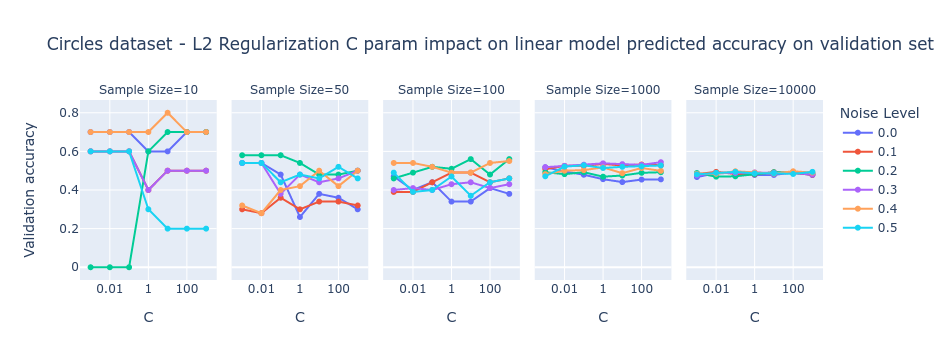

In [30]:
fig=px.line(df1_lm,x='C',y='acc_valid',
               labels={'noise_level':'Noise Level','n_sample': 'Sample Size','acc_valid':'Validation accuracy'},
               color='noise_level',facet_col='n_sample',markers=True,log_x=True,
               title='Circles dataset - L2 Regularization C param impact on linear model predicted accuracy on validation set')

fig.update_xaxes(nticks=7)
fig.show()

In general and for the Circles dataset, L2 regularization C param for the linear model doesn't help much to improve model accuracy for all sample sizes regardless of noise levels.<br>
The L2 regularization impact is relative higher on small datasets.<br>
As sample size increases its clear that the linear model can not seperate the class w/ accuracy above 50% at any L2 C value.<br>
The relatively high level of accuracy score when the sample size is very small (n=10) can be misleading about the suitability of the classifier model for the dataset. 

##### <b>Moons dataset</b>

In [51]:
df2_lm=df2.query("clf_type=='log_reg'").groupby(['noise_level','n_sample','C']).apply(lambda grp: grp.acc_valid).reset_index() 
df2_lm.sample(10)

noise_level  n_sample         C  level_3  acc_valid
172          0.4     10000    10.000     2650      0.828
188          0.5        50  1000.000     2750      0.720
66           0.1     10000     1.000     1914      0.882
62           0.1      1000  1000.000     1868      0.897
10           0.0        50     1.000     1522      0.820
5            0.0        10   100.000     1475      1.000
61           0.1      1000   100.000     1867      0.897
196          0.5      1000     0.001     2842      0.744
12           0.0        50   100.000     1524      0.860
166          0.4      1000   100.000     2602      0.839

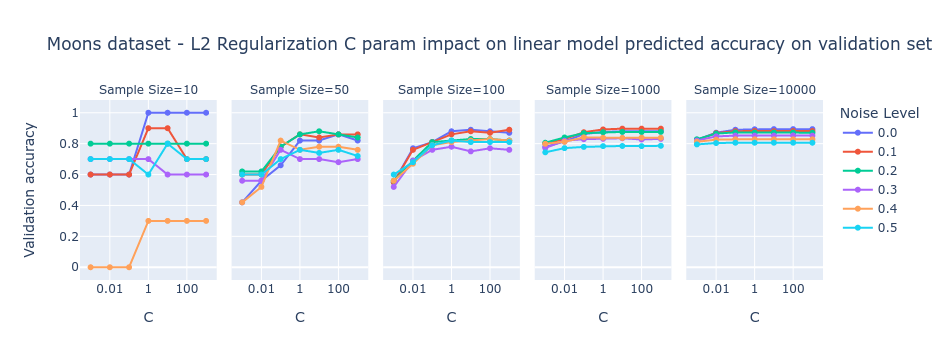

In [52]:
fig=px.line(df2_lm,x='C',y='acc_valid',
               labels={'noise_level':'Noise Level','n_sample': 'Sample Size','acc_valid':'Validation accuracy'},
               color='noise_level',facet_col='n_sample',markers=True,log_x=True,
               title='Moons dataset - L2 Regularization C param impact on linear model predicted accuracy on validation set')
fig.update_xaxes(nticks=7)
fig.update_yaxes(nticks=6)
fig.show()

On the moons dataset the linear classifier achieving better accuracy results relative to the results on the circles dataset<br>
There is differente optimal C value for each noise level to maximize the accuracy.<br>
L2 regularization C value impact on accuracy on small datasets and small impact when the sample size increases.<br>
If the linear classifier is capable sperate the class in the data, adding regularization is likely to help achieve better results.

#### <b>(4) Sample size impact on the train-test accuracy difference</b>

##### <span style="color:red"><b>Linear Classifier</b></span>

* <b>Circles dataset</b>

In [31]:
df1_lm=df1.query("clf_type=='log_reg'").groupby(['noise_level','C','n_sample']).apply(lambda grp: grp.acc_diff).reset_index()
df1_lm.sample(10)

noise_level         C  n_sample  level_3  acc_diff
175          0.5     0.001        10     1225     0.000
32           0.0  1000.000       100      104     0.134
15           0.0     1.000        10        3     0.044
68           0.1  1000.000      1000      398     0.012
186          0.5     0.100        50     1276     0.144
192          0.5     1.000       100     1326     0.059
29           0.0   100.000     10000      201     0.028
204          0.5   100.000     10000     1426     0.022
167          0.4   100.000       100     1083     0.052
72           0.2     0.001       100      588     0.078

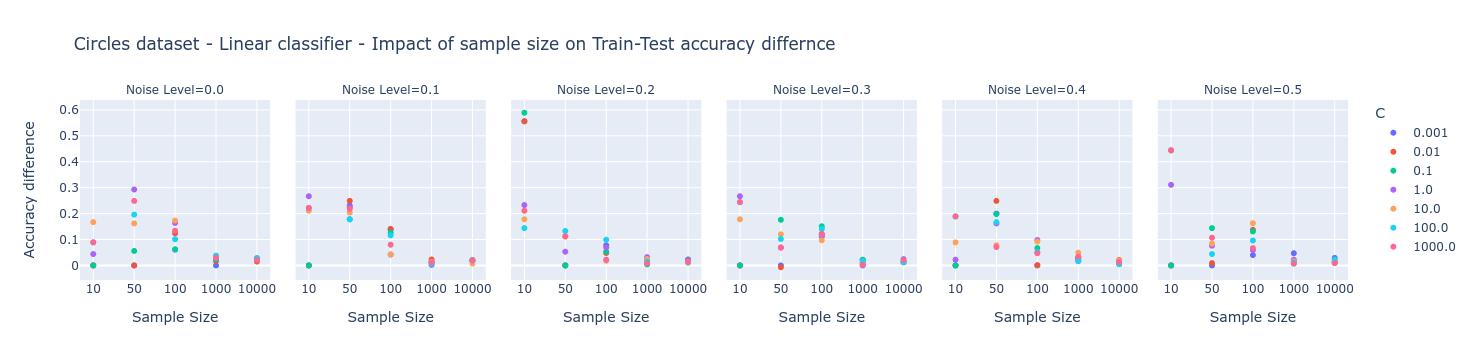

In [54]:
df1_lm.C = df1_lm.C.astype(str)
df1_lm.n_sample = df1_lm.n_sample.astype(str)

fig=px.scatter(df1_lm,x='n_sample',y='acc_diff',
               labels={'n_sample': 'Sample Size', 'acc_diff':'Accuracy difference', 'noise_level':'Noise Level'},
               color='C',hover_data=['n_sample'],facet_col='noise_level',
               title='Circles dataset - Linear classifier - Impact of sample size on Train-Test accuracy differnce')
fig.update_yaxes(nticks=7)
fig.show()

From chart we can see that tarin-test <b>accuracy difference decreases as sample size increases</b> for all noize levels and for all L2 regularization C param.<br>
For further analysis, we can calculate mean and standard deviation for Tarin-Test accuracy differnce across L2 C values in order to establish the argument.

In [33]:
df1_lm_stat=df1.query("clf_type=='log_reg'").groupby(['noise_level','n_sample']).acc_diff.agg(['mean','std']).reset_index()
df1_lm_stat

noise_level  n_sample      mean       std
0           0.0        10  0.055571  0.063311
1           0.0        50  0.136571  0.119082
2           0.0       100  0.117000  0.044907
3           0.0      1000  0.024571  0.012869
4           0.0     10000  0.023000  0.004546
5           0.1        10  0.131714  0.124457
6           0.1        50  0.211714  0.026725
7           0.1       100  0.097857  0.043114
8           0.1      1000  0.011714  0.006601
9           0.1     10000  0.017571  0.004756
10          0.2        10  0.352429  0.202888
11          0.2        50  0.058571  0.059963
12          0.2       100  0.055286  0.029358
13          0.2      1000  0.016714  0.010704
14          0.2     10000  0.017000  0.005000
15          0.3        10  0.133286  0.127599
16          0.3        50  0.075571  0.065030
17          0.3       100  0.123000  0.017981
18          0.3      1000  0.011429  0.008810
19          0.3     10000  0.015714  0.004821
20          0.4        10  0.069857  0.087261
21          0.4        50  0.160714  0.065396
22          0.4       100  0.051000  0.039294
23          0.4      1000  0.028857  0.011127
24          0.4     10000  0.012714  0.006396
25          0.5        10  0.234714  0.224534
26          0.5        50  0.066286  0.052086
27          0.5       100  0.099000  0.045967
28          0.5      1000  0.018429  0.013649
29          0.5     10000  0.016286  0.007387

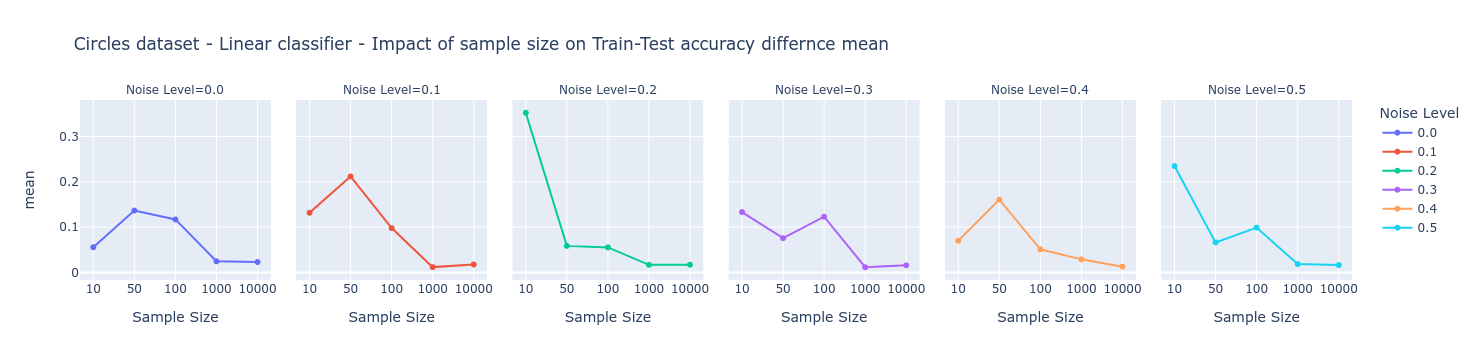

In [38]:
df1_lm_stat.noise_level = df1_lm_stat.noise_level.astype(str)
df1_lm_stat.n_sample = df1_lm_stat.n_sample.astype(str)

fig=px.line(df1_lm_stat,x='n_sample',y='mean',
               labels={'n_sample': 'Sample Size', 'noise_level':'Noise Level'},
               color='noise_level',hover_data=['mean'],facet_col='noise_level',markers=True,
               title='Circles dataset - Linear classifier - Impact of sample size on Train-Test accuracy differnce mean')
fig.show()

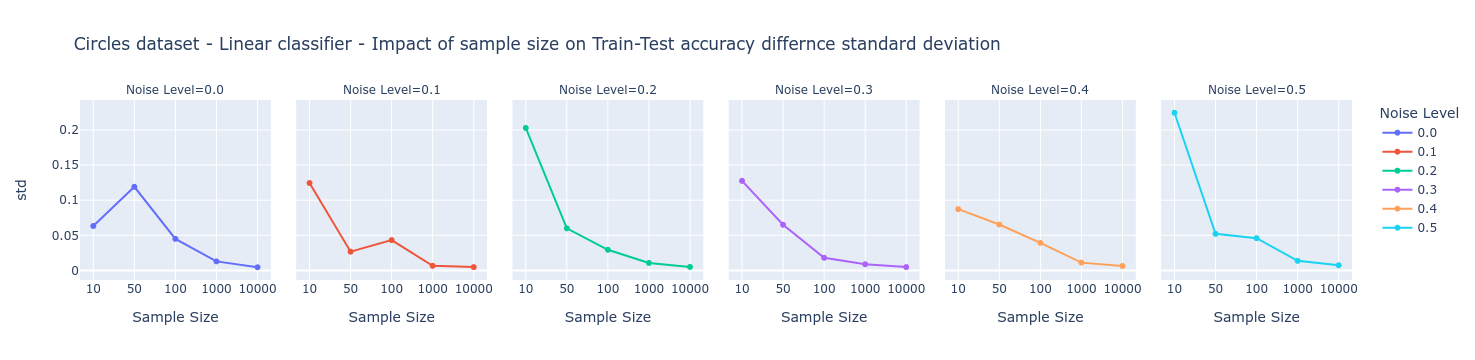

In [39]:
df1_lm_stat.noise_level = df1_lm_stat.noise_level.astype(str)
df1_lm_stat.n_sample = df1_lm_stat.n_sample.astype(str)

fig=px.line(df1_lm_stat,x='n_sample',y='std',
               labels={'n_sample': 'Sample Size', 'noise_level':'Noise Level'},
               color='noise_level',hover_data=['std'],facet_col='noise_level',markers=True,
               title='Circles dataset - Linear classifier - Impact of sample size on Train-Test accuracy differnce standard deviation ')
fig.show()

As expected, the mean and the standard deviation of Train-Test accuracy difference for different L2 C values,  drops as sample size increase, for all noise levels.

* <b>Moons dataset</b>

In [40]:
df2_lm=df1.query("clf_type=='log_reg'").groupby(['noise_level','C','n_sample']).apply(lambda grp: grp.acc_diff).reset_index()
df2_lm.sample(10)

noise_level        C  n_sample  level_3  acc_diff
197          0.5    10.00       100     1327     0.163
188          0.5     0.10      1000     1374     0.007
40           0.1     0.01        10      246     0.000
52           0.1     1.00       100      346     0.042
121          0.3     1.00        50      787     0.069
189          0.5     0.10     10000     1423     0.010
19           0.0     1.00     10000      199     0.028
202          0.5   100.00       100     1328     0.096
180          0.5     0.01        10     1226     0.000
136          0.3  1000.00        50      790     0.069

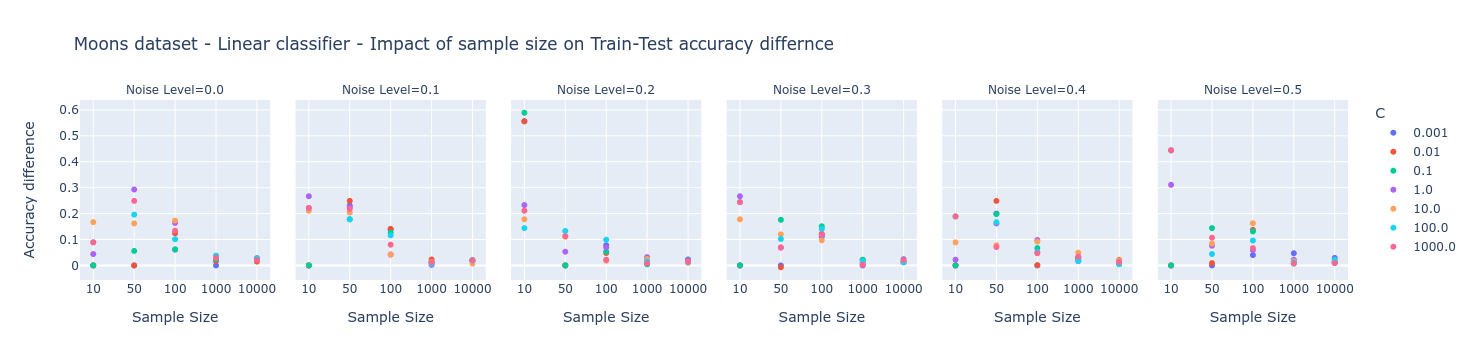

In [57]:
df2_lm.C = df2_lm.C.astype(str)
df2_lm.n_sample = df2_lm.n_sample.astype(str)

fig=px.scatter(df1_lm,x='n_sample',y='acc_diff',
               labels={'n_sample': 'Sample Size', 'acc_diff':'Accuracy difference', 'noise_level':'Noise Level'},
               color='C',hover_data=['n_sample'],facet_col='noise_level',
               title='Moons dataset - Linear classifier - Impact of sample size on Train-Test accuracy differnce')
fig.update_yaxes(nticks=7)
fig.show()

In [58]:
df2_lm_stat=df1.query("clf_type=='log_reg'").groupby(['noise_level','n_sample']).acc_diff.agg(['mean','std']).reset_index()
df2_lm_stat

noise_level  n_sample      mean       std
0           0.0        10  0.055571  0.063311
1           0.0        50  0.136571  0.119082
2           0.0       100  0.117000  0.044907
3           0.0      1000  0.024571  0.012869
4           0.0     10000  0.023000  0.004546
5           0.1        10  0.131714  0.124457
6           0.1        50  0.211714  0.026725
7           0.1       100  0.097857  0.043114
8           0.1      1000  0.011714  0.006601
9           0.1     10000  0.017571  0.004756
10          0.2        10  0.352429  0.202888
11          0.2        50  0.058571  0.059963
12          0.2       100  0.055286  0.029358
13          0.2      1000  0.016714  0.010704
14          0.2     10000  0.017000  0.005000
15          0.3        10  0.133286  0.127599
16          0.3        50  0.075571  0.065030
17          0.3       100  0.123000  0.017981
18          0.3      1000  0.011429  0.008810
19          0.3     10000  0.015714  0.004821
20          0.4        10  0.069857  0.087261
21          0.4        50  0.160714  0.065396
22          0.4       100  0.051000  0.039294
23          0.4      1000  0.028857  0.011127
24          0.4     10000  0.012714  0.006396
25          0.5        10  0.234714  0.224534
26          0.5        50  0.066286  0.052086
27          0.5       100  0.099000  0.045967
28          0.5      1000  0.018429  0.013649
29          0.5     10000  0.016286  0.007387

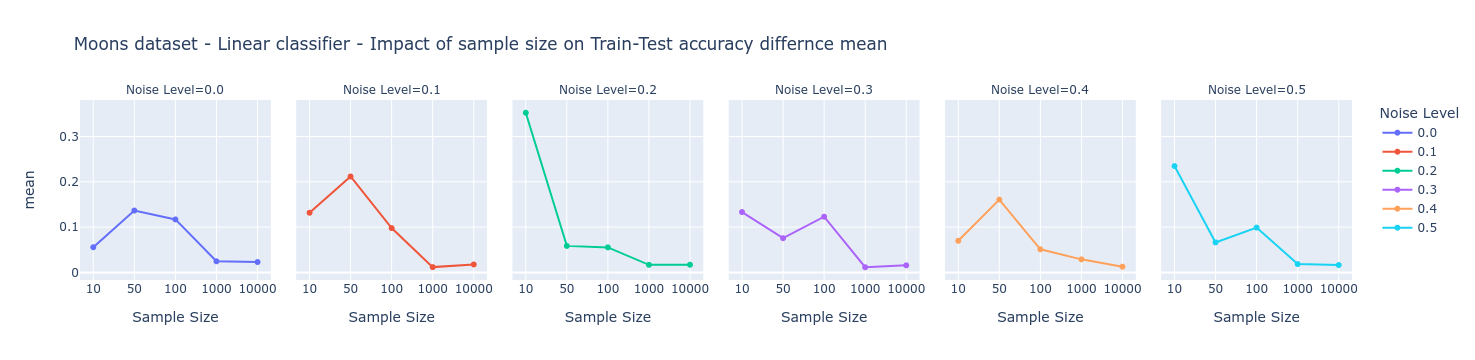

In [59]:
df2_lm_stat.noise_level = df2_lm_stat.noise_level.astype(str)
df2_lm_stat.n_sample = df2_lm_stat.n_sample.astype(str)

fig=px.line(df2_lm_stat,x='n_sample',y='mean',
               labels={'n_sample': 'Sample Size', 'noise_level':'Noise Level'},
               color='noise_level',hover_data=['mean'],facet_col='noise_level',markers=True,
               title='Moons dataset - Linear classifier - Impact of sample size on Train-Test accuracy differnce mean')
fig.show()

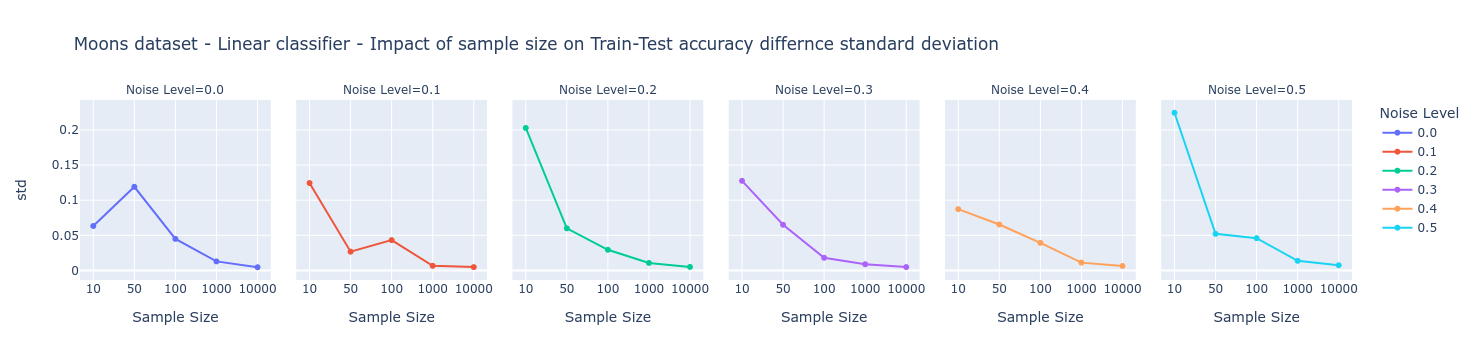

In [60]:
df2_lm_stat.noise_level = df2_lm_stat.noise_level.astype(str)
df2_lm_stat.n_sample = df2_lm_stat.n_sample.astype(str)

fig=px.line(df2_lm_stat,x='n_sample',y='std',
               labels={'n_sample': 'Sample Size', 'noise_level':'Noise Level'},
               color='noise_level',hover_data=['std'],facet_col='noise_level',markers=True,
               title='Moons dataset - Linear classifier - Impact of sample size on Train-Test accuracy differnce standard deviation ')
fig.show()

Same results also for the Moons dataset. <b>Train-Test accuracy difference decreases as sample size increases</b> for all noize levels and for all L2 regularization C param.<br>
Also the mean and the standard deviation of Train-Test accuracy difference for different L2 C values,  drops as sample size increase, for all noise levels.

##### <span style="color:red"><b>SVM Classifier</b></span>

* <b>Circles dataset</b>

In [61]:
df1_svm=df1.query("clf_type=='svm'").groupby(['noise_level','C','gamma','n_sample']).apply(lambda grp: grp.acc_diff).reset_index()
df1_svm.sample(10)

noise_level     C    gamma  n_sample  level_4  acc_diff
876           0.4   0.1    10.00        50     1043     0.311
748           0.3   1.0    50.00      1000      912     0.183
303           0.1   1.0     1.00      1000      417     0.006
751           0.3   1.0   100.00        50      815     0.600
534           0.2   1.0    25.00     10000      715     0.007
1047          0.4  10.0  1000.00       100     1126     0.500
1204          0.5  10.0     0.01     10000     1458     0.000
957           0.4   1.0    50.00       100     1108     0.490
797           0.3  10.0     2.00       100      873     0.248
1160          0.5   1.0    25.00        10     1254     0.400

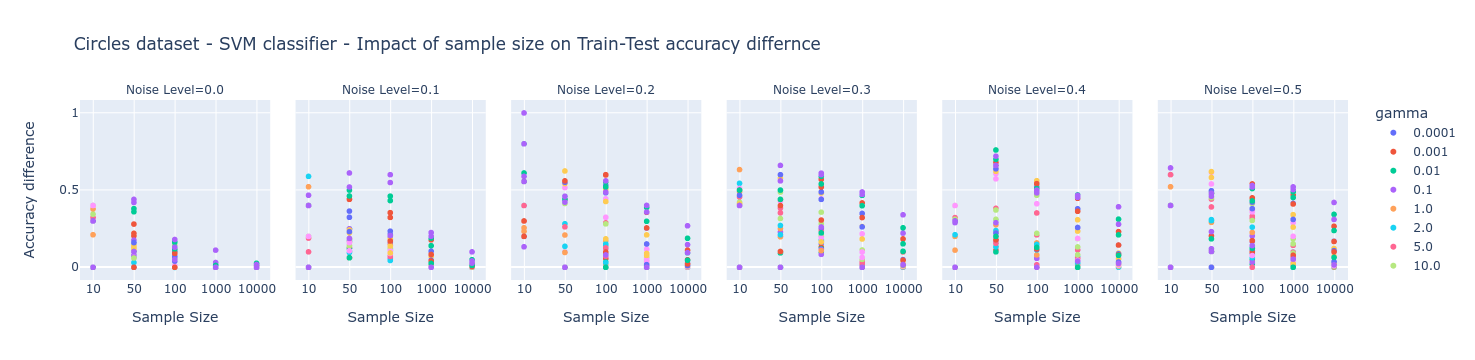

In [62]:
df1_svm.gamma = df1_svm.gamma.astype(str)
df1_svm.n_sample = df1_svm.n_sample.astype(str)

fig=px.scatter(df1_svm,x='n_sample',y='acc_diff',
               labels={'n_sample': 'Sample Size', 'acc_diff':'Accuracy difference', 'noise_level':'Noise Level'},
               color='gamma',facet_col='noise_level',
               title='Circles dataset - SVM classifier - Impact of sample size on Train-Test accuracy differnce')
fig.show()

In [63]:
df1_svm_stat=df1.query("clf_type=='svm'").groupby(['noise_level','n_sample']).acc_diff.agg(['mean','std']).reset_index()
df1_svm_stat

noise_level  n_sample      mean       std
0           0.0        10  0.163738  0.169438
1           0.0        50  0.111452  0.118363
2           0.0       100  0.071881  0.054184
3           0.0      1000  0.004048  0.017802
4           0.0     10000  0.003476  0.007051
5           0.1        10  0.173024  0.196671
6           0.1        50  0.210524  0.138527
7           0.1       100  0.178500  0.128546
8           0.1      1000  0.042095  0.058705
9           0.1     10000  0.011524  0.017870
10          0.2        10  0.463952  0.201262
11          0.2        50  0.201786  0.232743
12          0.2       100  0.203095  0.207888
13          0.2      1000  0.080857  0.123005
14          0.2     10000  0.031333  0.056006
15          0.3        10  0.237024  0.243359
16          0.3        50  0.236095  0.212659
17          0.3       100  0.282667  0.165062
18          0.3      1000  0.107048  0.157286
19          0.3     10000  0.044595  0.077308
20          0.4        10  0.146286  0.153971
21          0.4        50  0.349643  0.217168
22          0.4       100  0.199119  0.220211
23          0.4      1000  0.127214  0.160839
24          0.4     10000  0.059095  0.093926
25          0.5        10  0.232524  0.244769
26          0.5        50  0.252690  0.215862
27          0.5       100  0.245190  0.164893
28          0.5      1000  0.145571  0.169366
29          0.5     10000  0.066476  0.104281

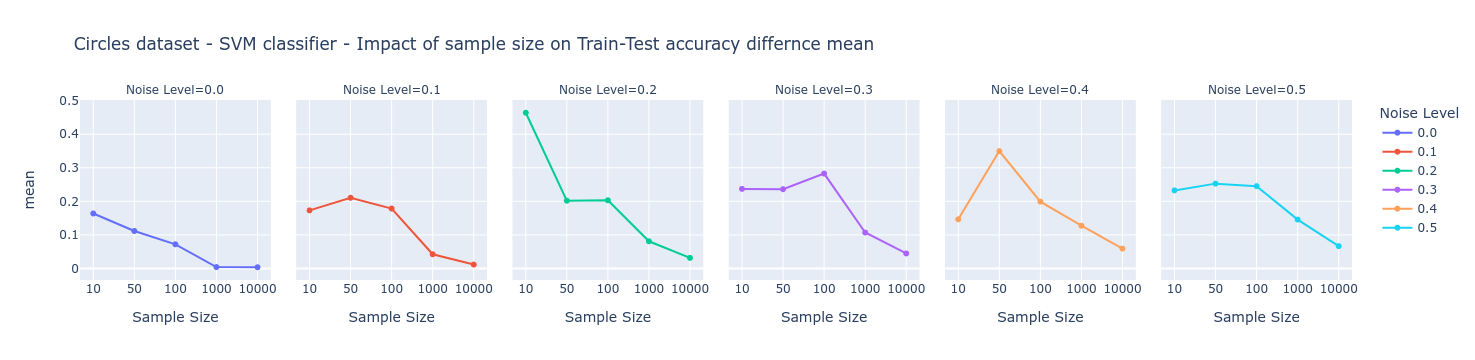

In [64]:
df1_svm_stat.noise_level = df1_svm_stat.noise_level.astype(str)
df1_svm_stat.n_sample = df1_svm_stat.n_sample.astype(str)

fig=px.line(df1_svm_stat,x='n_sample',y='mean',
               labels={'n_sample': 'Sample Size', 'noise_level':'Noise Level'},
               color='noise_level',facet_col='noise_level',markers=True,
               title='Circles dataset - SVM classifier - Impact of sample size on Train-Test accuracy differnce mean')
fig.show()

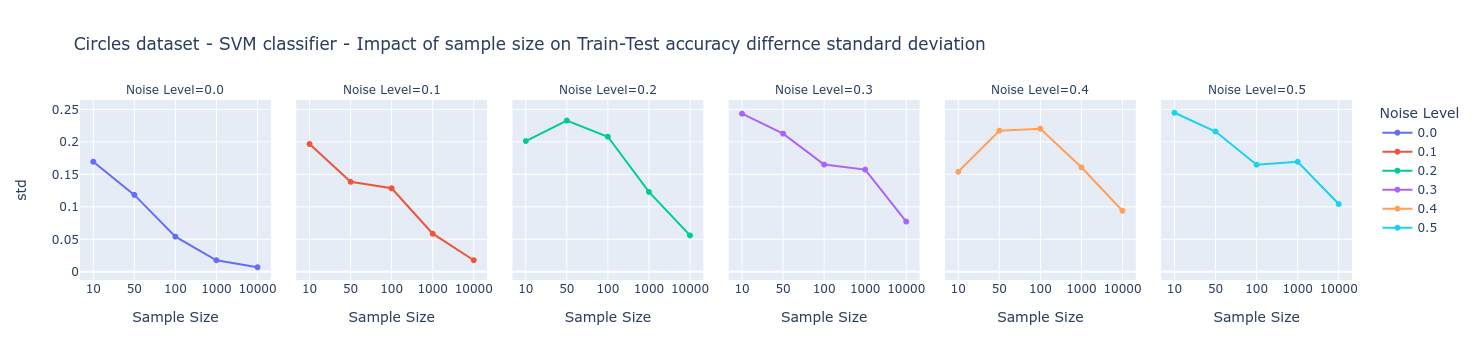

In [69]:
df1_svm_stat.noise_level = df1_svm_stat.noise_level.astype(str)
df1_svm_stat.n_sample = df1_svm_stat.n_sample.astype(str)

fig=px.line(df1_svm_stat,x='n_sample',y='std',
               labels={'n_sample': 'Sample Size', 'noise_level':'Noise Level'},
               color='noise_level',facet_col='noise_level',markers=True,
               title='Circles dataset - SVM classifier - Impact of sample size on Train-Test accuracy differnce standard deviation')
fig.update_yaxes(nticks=6)
fig.show()

* <b>Moons dataset</b>

In [70]:
df2_svm=df2.query("clf_type=='svm'").groupby(['noise_level','C','gamma','n_sample']).apply(lambda grp: grp.acc_diff).reset_index()
df2_svm.sample(10)

noise_level     C  gamma  n_sample  level_4  acc_diff
333           0.1   1.0  100.0      1000     1893     0.000
118           0.0   1.0   50.0      1000     1647     0.000
1166          0.5   1.0   50.0        50     2774     0.387
239           0.1   0.1    2.0     10000     1923     0.000
602           0.2  10.0   25.0       100     2101     0.020
1150          0.5   1.0    5.0        10     2722     0.300
829           0.3  10.0  250.0     10000     2447     0.032
1224          0.5  10.0    5.0     10000     2932     0.002
1010          0.4  10.0    5.0        10     2491     0.800
44            0.0   0.1   25.0     10000     1681     0.000

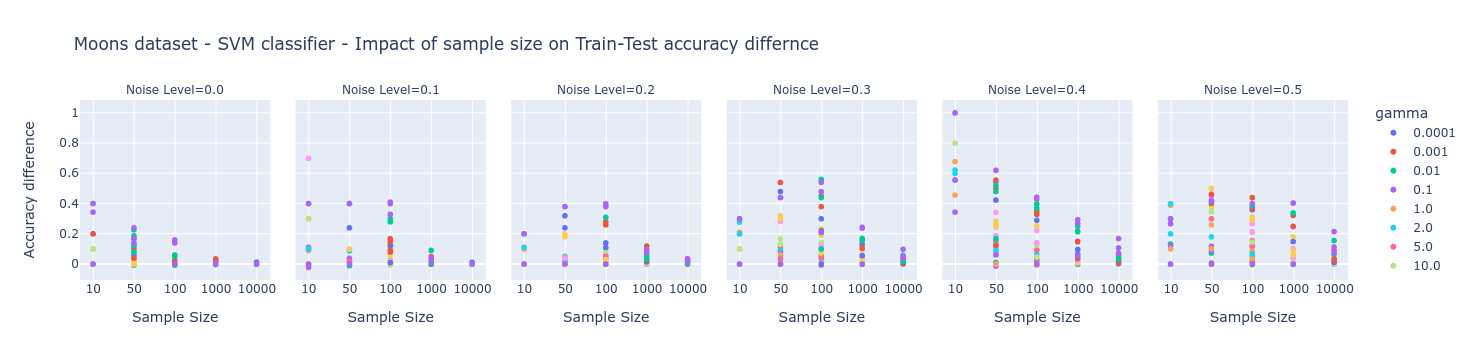

In [73]:
df2_svm.gamma = df2_svm.gamma.astype(str)
df2_svm.n_sample = df2_svm.n_sample.astype(str)

fig=px.scatter(df2_svm,x='n_sample',y='acc_diff',
               labels={'n_sample': 'Sample Size', 'acc_diff':'Accuracy difference', 'noise_level':'Noise Level'},
               color='gamma',facet_col='noise_level',
               title='Moons dataset - SVM classifier - Impact of sample size on Train-Test accuracy differnce')
fig.update_yaxes(nticks=6)
fig.show()

In [74]:
df2_svm_stat=df2.query("clf_type=='svm'").groupby(['noise_level','n_sample']).acc_diff.agg(['mean','std']).reset_index()
df2_svm_stat

noise_level  n_sample      mean       std
0           0.0        10  0.115333  0.145641
1           0.0        50  0.081690  0.076014
2           0.0       100  0.018238  0.040511
3           0.0      1000  0.002000  0.007019
4           0.0     10000  0.000310  0.002018
5           0.1        10  0.170905  0.211497
6           0.1        50  0.079548  0.143772
7           0.1       100  0.081024  0.116264
8           0.1      1000  0.008429  0.018889
9           0.1     10000  0.000810  0.001903
10          0.2        10  0.093119  0.097297
11          0.2        50  0.086857  0.139525
12          0.2       100  0.065714  0.117107
13          0.2      1000  0.021524  0.030787
14          0.2     10000  0.004000  0.007454
15          0.3        10  0.125929  0.137554
16          0.3        50  0.140643  0.185372
17          0.3       100  0.138833  0.159418
18          0.3      1000  0.039476  0.066871
19          0.3     10000  0.009833  0.019779
20          0.4        10  0.704190  0.207044
21          0.4        50  0.221310  0.179670
22          0.4       100  0.105857  0.145659
23          0.4      1000  0.054952  0.081623
24          0.4     10000  0.017286  0.035932
25          0.5        10  0.152643  0.150332
26          0.5        50  0.184476  0.195758
27          0.5       100  0.131095  0.152818
28          0.5      1000  0.076095  0.123446
29          0.5     10000  0.023857  0.046144

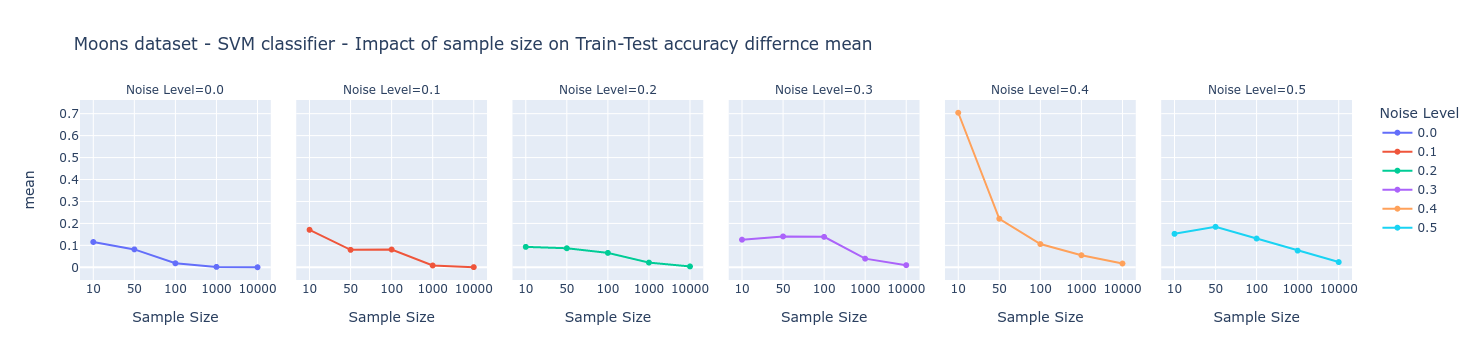

In [83]:
df2_svm_stat.noise_level = df2_svm_stat.noise_level.astype(str)
df2_svm_stat.n_sample = df2_svm_stat.n_sample.astype(str)

fig=px.line(df2_svm_stat,x='n_sample',y='mean',
               labels={'n_sample': 'Sample Size', 'noise_level':'Noise Level'},
               color='noise_level',facet_col='noise_level',markers=True,
               title='Moons dataset - SVM classifier - Impact of sample size on Train-Test accuracy differnce mean')
fig.update_yaxes(nticks=9)
fig.show()

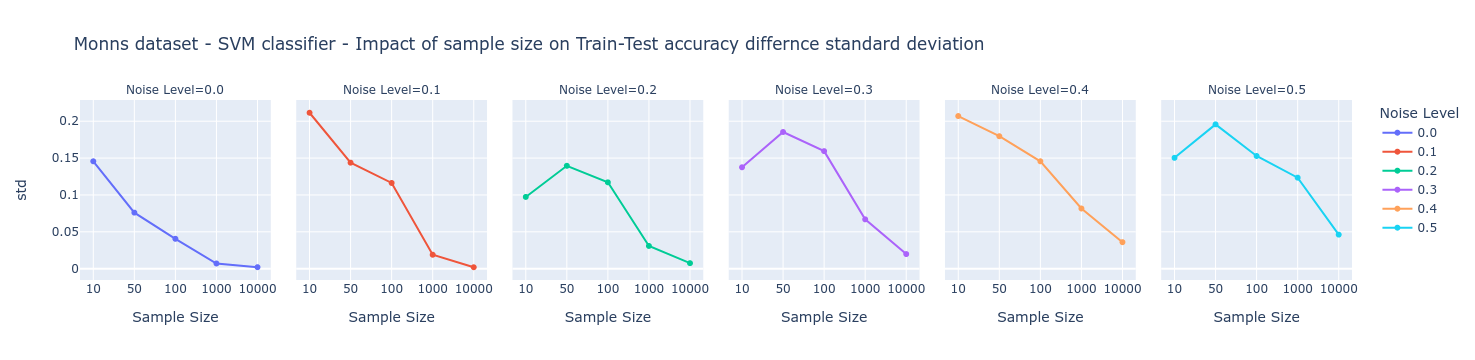

In [84]:
df2_svm_stat.noise_level = df2_svm_stat.noise_level.astype(str)
df2_svm_stat.n_sample = df2_svm_stat.n_sample.astype(str)

fig=px.line(df2_svm_stat,x='n_sample',y='std',
               labels={'n_sample': 'Sample Size', 'noise_level':'Noise Level'},
               color='noise_level',facet_col='noise_level',markers=True,
               title='Monns dataset - SVM classifier - Impact of sample size on Train-Test accuracy differnce standard deviation')
fig.show()

Similar to the results for the linear model, the Train-Test accuracy difference for SVM classifier decreases as sample size increases for all nosise levels.<br>
In comparison to linear classifier, the Train-Test accuracy difference tends to be higher in SVM at given sample size dou to <b>overfit</b> on the train set - higher predicted accuracy on train set compair to the predicted accuracy on the test set.

#### <b>(5) Impact of model complexity on accuracy score of Train,Test and the difference (overfitting)</b>

##### <span style="color:red"><b>linear Classifier</b></span> 

* <b>Circles dataset</b>

In [85]:
df1_lm=df1.query("clf_type=='log_reg'").groupby(['n_sample','noise_level','C']).head()
df1_lm

dataset  n_sample  noise_level clf_type  acc_train  std_train  \
0     circles        10          0.0  log_reg      0.700      0.051   
1     circles        10          0.0  log_reg      0.700      0.051   
2     circles        10          0.0  log_reg      0.700      0.051   
3     circles        10          0.0  log_reg      0.644      0.109   
4     circles        10          0.0  log_reg      0.767      0.126   
...       ...       ...          ...      ...        ...        ...   
1423  circles     10000          0.5  log_reg      0.504      0.014   
1424  circles     10000          0.5  log_reg      0.500      0.016   
1425  circles     10000          0.5  log_reg      0.506      0.017   
1426  circles     10000          0.5  log_reg      0.505      0.013   
1427  circles     10000          0.5  log_reg      0.503      0.015   

      acc_valid  std_valid  acc_diff         C  gamma  
0         0.700      0.458     0.000     0.001    0.0  
1         0.700      0.458     0.000     0.010    0.0  
2         0.700      0.458     0.000     0.100    0.0  
3         0.600      0.490     0.044     1.000    0.0  
4         0.600      0.490     0.167    10.000    0.0  
...         ...        ...       ...       ...    ...  
1423      0.494      0.019     0.010     0.100    0.0  
1424      0.486      0.018     0.014     1.000    0.0  
1425      0.487      0.022     0.019    10.000    0.0  
1426      0.483      0.013     0.022   100.000    0.0  
1427      0.494      0.020     0.009  1000.000    0.0  

[210 rows x 11 columns]

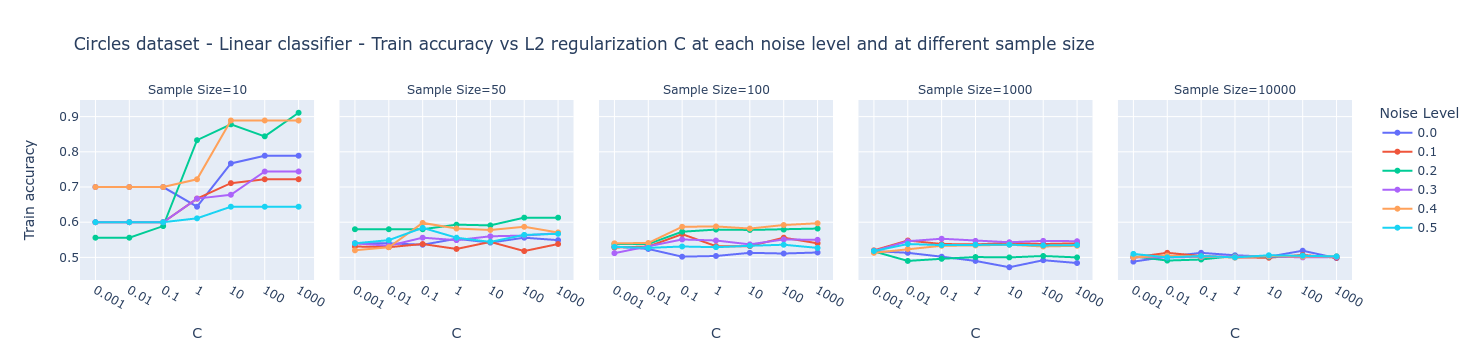

In [86]:
fig=px.line(df1_lm,x='C',y='acc_train',
               labels={'noise_level':'Noise Level','n_sample': 'Sample Size','acc_train':'Train accuracy'},
               color='noise_level',facet_col='n_sample',markers=True,log_x=True,
               title='Circles dataset - Linear classifier - Train accuracy vs L2 regularization C at each noise level and at different sample size')
fig.update_xaxes(nticks=7)
fig.show()

Change in L2 regularization C value for linear classifier does not helps much to improve the poor permormence on the circles dataset.<br>
As sample size increases its clear that the linear model can not seperate the class w/ accuracy above 50% at any L2 C value.<br>
The relatively high level of accuracy score when the sample size is very small (n=10) can be misleading about the suitability of the classifier model for the dataset. 

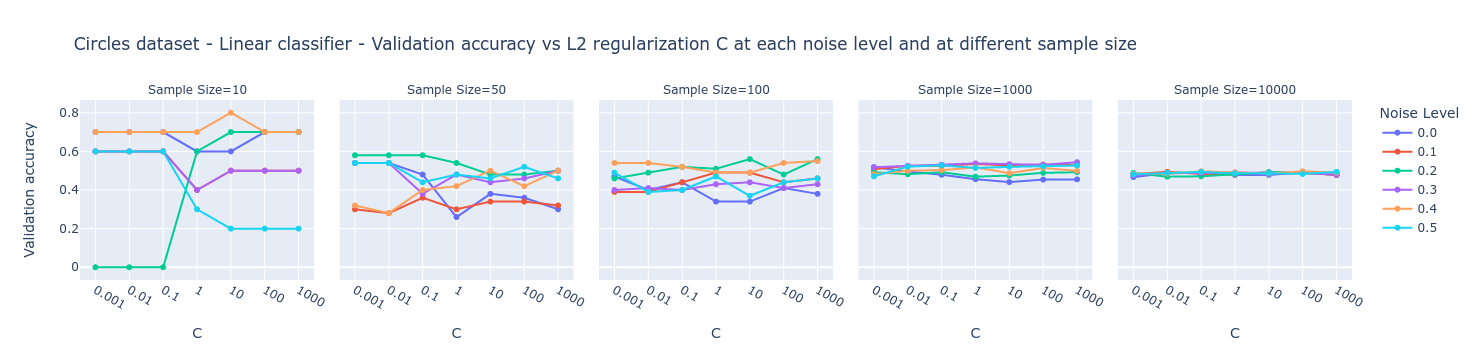

In [87]:
fig=px.line(df1_lm,x='C',y='acc_valid',
               labels={'noise_level':'Noise Level','n_sample': 'Sample Size','acc_valid':'Validation accuracy'},
               color='noise_level',facet_col='n_sample',markers=True,log_x=True,
               title='Circles dataset - Linear classifier - Validation accuracy vs L2 regularization C at each noise level and at different sample size')
fig.update_xaxes(nticks=7)
fig.show()

As expected, same poor performence of the linear classifier on the validation set at any L2 regularization C value.<br>
No real impact of regularization on the classifier performence at any noise level when sample size increase.

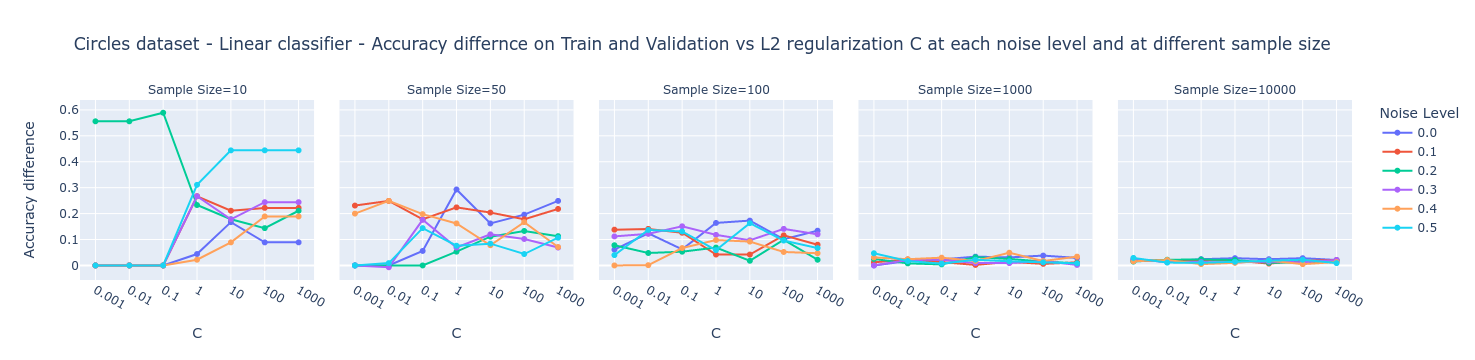

In [88]:
fig=px.line(df1_lm,x='C',y='acc_diff',
               labels={'noise_level':'Noise Level','n_sample': 'Sample Size','acc_diff':'Accuracy difference'},
               color='noise_level',facet_col='n_sample',markers=True,log_x=True,
               title='Circles dataset - Linear classifier - Accuracy differnce on Train and Validation vs L2 regularization C at each noise level and at different sample size')
fig.update_yaxes(nticks=7)
fig.update_xaxes(nticks=7)
fig.show()

Accuracy difference converge to zero as sample size increase at any C and noise level.

In [89]:
df2_lm=df2.query("clf_type=='log_reg'").groupby(['n_sample','noise_level','C']).head()
df2_lm

dataset  n_sample  noise_level clf_type  acc_train  std_train  acc_valid  \
1470   moons        10          0.0  log_reg      0.600      0.054      0.600   
1471   moons        10          0.0  log_reg      0.600      0.054      0.600   
1472   moons        10          0.0  log_reg      0.711      0.124      0.600   
1473   moons        10          0.0  log_reg      1.000      0.000      1.000   
1474   moons        10          0.0  log_reg      1.000      0.000      1.000   
...      ...       ...          ...      ...        ...        ...        ...   
2893   moons     10000          0.5  log_reg      0.806      0.001      0.806   
2894   moons     10000          0.5  log_reg      0.806      0.001      0.806   
2895   moons     10000          0.5  log_reg      0.806      0.002      0.806   
2896   moons     10000          0.5  log_reg      0.806      0.001      0.806   
2897   moons     10000          0.5  log_reg      0.806      0.001      0.806   

      std_valid  acc_diff         C  gamma  
1470      0.490     0.000     0.001    0.0  
1471      0.490     0.000     0.010    0.0  
1472      0.490     0.111     0.100    0.0  
1473      0.000     0.000     1.000    0.0  
1474      0.000     0.000    10.000    0.0  
...         ...       ...       ...    ...  
2893      0.008     0.000     0.100    0.0  
2894      0.012     0.000     1.000    0.0  
2895      0.015     0.000    10.000    0.0  
2896      0.008     0.000   100.000    0.0  
2897      0.010     0.000  1000.000    0.0  

[210 rows x 11 columns]

* <b>Monns dataset</b>

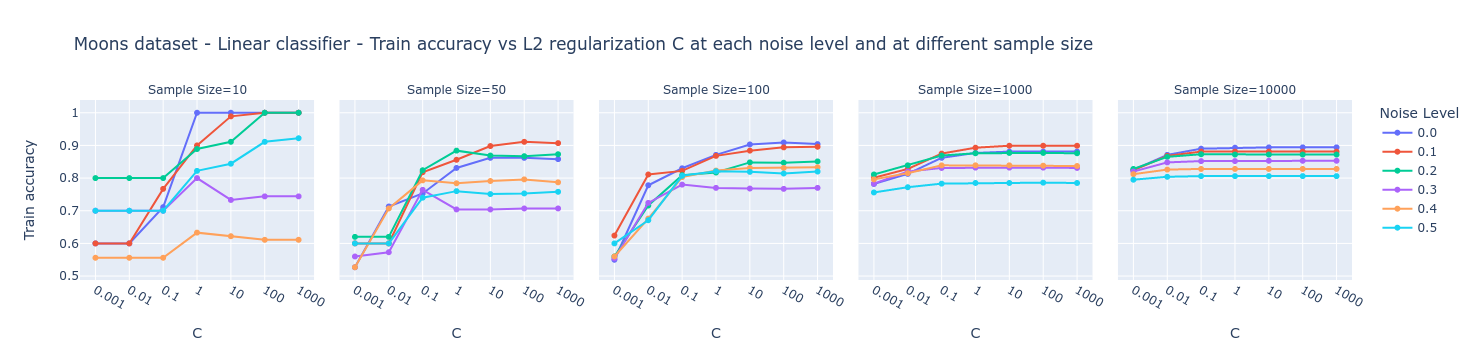

In [90]:
fig=px.line(df2_lm,x='C',y='acc_train',
               labels={'noise_level':'Noise Level','n_sample': 'Sample Size','acc_train':'Train accuracy'},
               color='noise_level',facet_col='n_sample',markers=True,log_x=True,
               title='Moons dataset - Linear classifier - Train accuracy vs L2 regularization C at each noise level and at different sample size')
fig.update_xaxes(nticks=7)
fig.update_yaxes(nticks=6)
fig.show()

In general, On the moons dateset the linear classifier performs much better compare to the circles datase.<br>
When C value is very small (high L2 regularization) the accuracy score is compromised.<br>
The L2 regularization impacts accuracy score the most when the sample size is relative small.

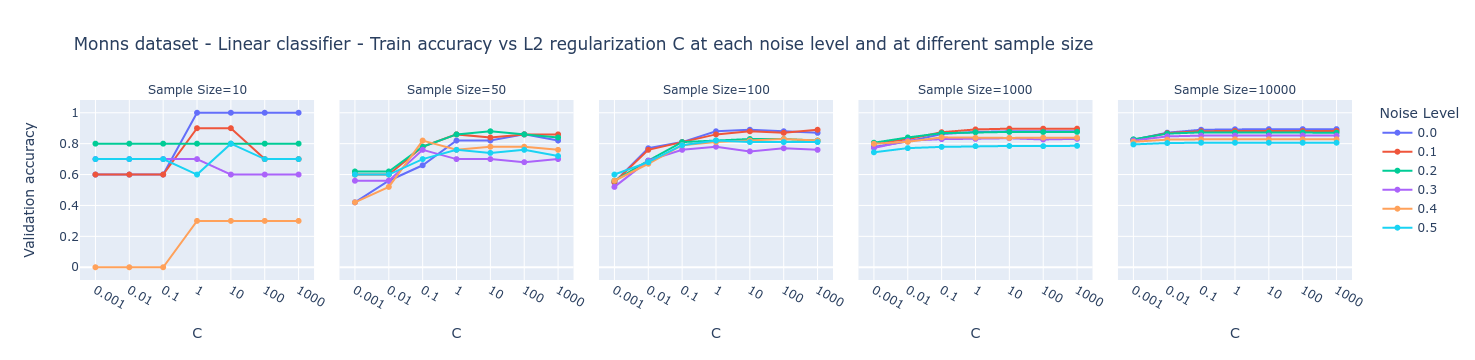

In [91]:
fig=px.line(df2_lm,x='C',y='acc_valid',
               labels={'noise_level':'Noise Level','n_sample': 'Sample Size','acc_valid':'Validation accuracy'},
               color='noise_level',facet_col='n_sample',markers=True,log_x=True,
               title='Monns dataset - Linear classifier - Train accuracy vs L2 regularization C at each noise level and at different sample size')
fig.update_xaxes(nticks=7)
fig.update_yaxes(nticks=6)
fig.show()

Slightly smaller effect of L2 regularization C values on accuracy score on validation set.<br>
Accuracy score on validation set is very similar to the score on the train set.


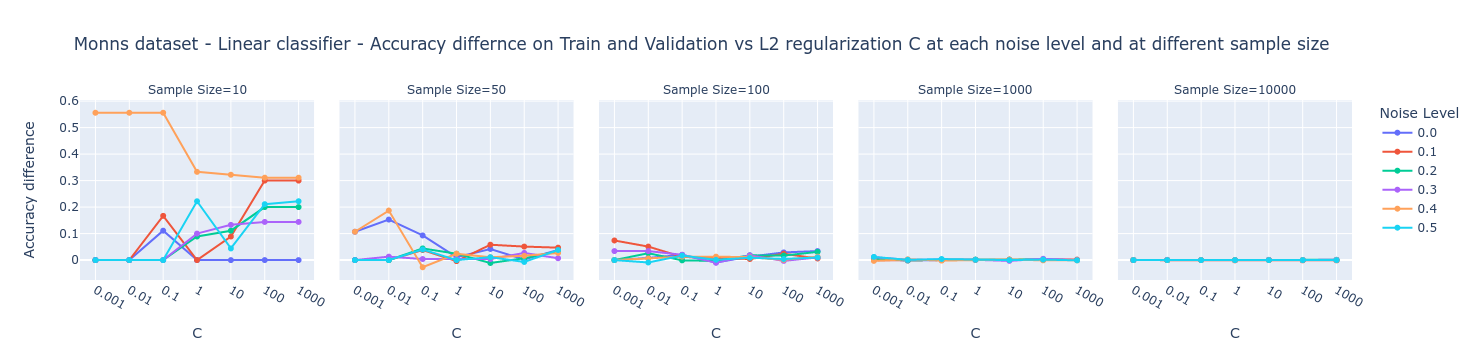

In [92]:
fig=px.line(df2_lm,x='C',y='acc_diff',
               labels={'noise_level':'Noise Level','n_sample': 'Sample Size','acc_diff':'Accuracy difference'},
               color='noise_level',facet_col='n_sample',markers=True,log_x=True,
               title='Monns dataset - Linear classifier - Accuracy differnce on Train and Validation vs L2 regularization C at each noise level and at different sample size')
fig.update_xaxes(nticks=7)
fig.update_yaxes(nticks=7)
fig.show()

Accuracy difference Converging to zero as sample size increase and for all C valuse and noise levels.<br>
L2 regularization impacts accuracy differnce score the most when the sample size is relative small.

##### <span style="color:red"><b>SVM Classifier</b></span> 

* <b>Circles dateset</b>

In [93]:
df1_svm=df1.query("clf_type=='svm' & C==1").groupby(['n_sample','noise_level','gamma']).head()
df1_svm

dataset  n_sample  noise_level clf_type  acc_train  std_train  \
21    circles        10          0.0      svm      0.700      0.051   
22    circles        10          0.0      svm      0.700      0.051   
23    circles        10          0.0      svm      0.700      0.051   
24    circles        10          0.0      svm      0.700      0.051   
25    circles        10          0.0      svm      0.878      0.060   
...       ...       ...          ...      ...        ...        ...   
1451  circles     10000          0.5      svm      0.624      0.002   
1452  circles     10000          0.5      svm      0.652      0.003   
1453  circles     10000          0.5      svm      0.711      0.003   
1454  circles     10000          0.5      svm      0.768      0.001   
1455  circles     10000          0.5      svm      0.830      0.002   

      acc_valid  std_valid  acc_diff    C      gamma  
21        0.700      0.458     0.000  1.0     0.0001  
22        0.700      0.458     0.000  1.0     0.0010  
23        0.700      0.458     0.000  1.0     0.0100  
24        0.700      0.458     0.000  1.0     0.1000  
25        0.500      0.500     0.378  1.0     1.0000  
...         ...        ...       ...  ...        ...  
1451      0.553      0.010     0.071  1.0    50.0000  
1452      0.544      0.011     0.108  1.0   100.0000  
1453      0.544      0.016     0.167  1.0   250.0000  
1454      0.530      0.014     0.238  1.0   500.0000  
1455      0.520      0.020     0.310  1.0  1000.0000  

[420 rows x 11 columns]

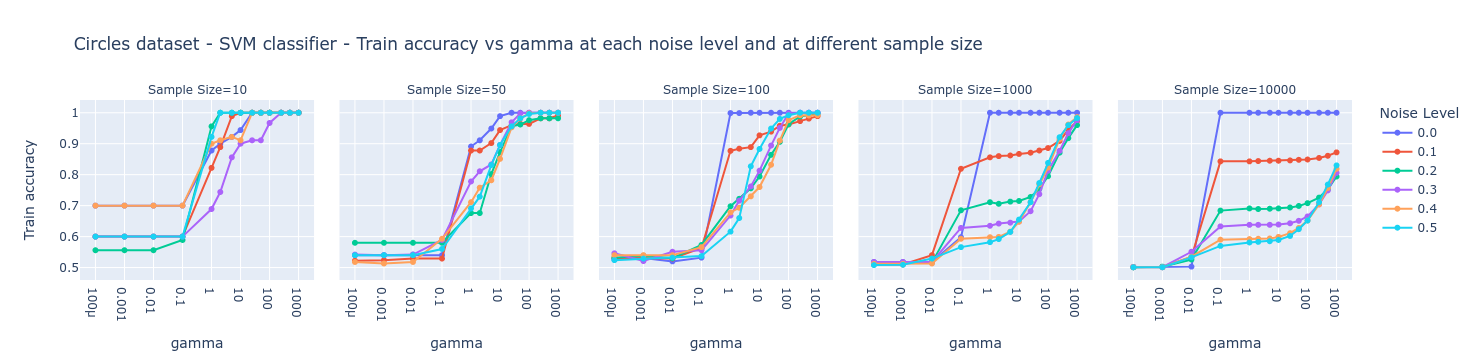

In [94]:
fig=px.line(df1_svm,x='gamma',y='acc_train',
               labels={'noise_level':'Noise Level','n_sample': 'Sample Size','acc_train':'Train accuracy'},
               color='noise_level',facet_col='n_sample',markers=True,log_x=True,
               title='Circles dataset - SVM classifier - Train accuracy vs gamma at each noise level and at different sample size')
fig.update_xaxes(nticks=9)
fig.update_yaxes(nticks=6)
fig.show()

Accuracy score on train set increase at higher gamma levels.<br>
For each noise level SVM fits the train set more accurate as gamma increases (higher complexity).<br>
Train accuracy and gamma are possitive correlated.

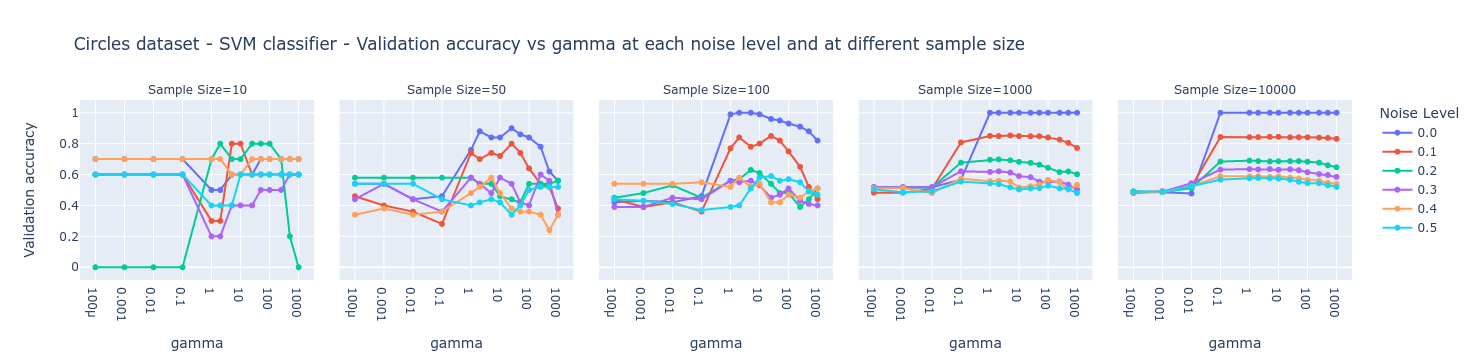

In [95]:
fig=px.line(df1_svm,x='gamma',y='acc_valid',
               labels={'noise_level':'Noise Level','n_sample': 'Sample Size','acc_valid':'Validation accuracy'},
               color='noise_level',facet_col='n_sample',markers=True,log_x=True,
               title='Circles dataset - SVM classifier - Validation accuracy vs gamma at each noise level and at different sample size')
fig.update_xaxes(nticks=9)
fig.update_yaxes(nticks=6)
fig.show()

Unlike the previous positive correlation between accuracy score on the train and gamma level, now we get more mixed picture.<br>
Gamma helps to improve the accuracy on the validation set till certain point. From this point on accuracy starts to decrease - sign to <b>overftting</b> on the train set.

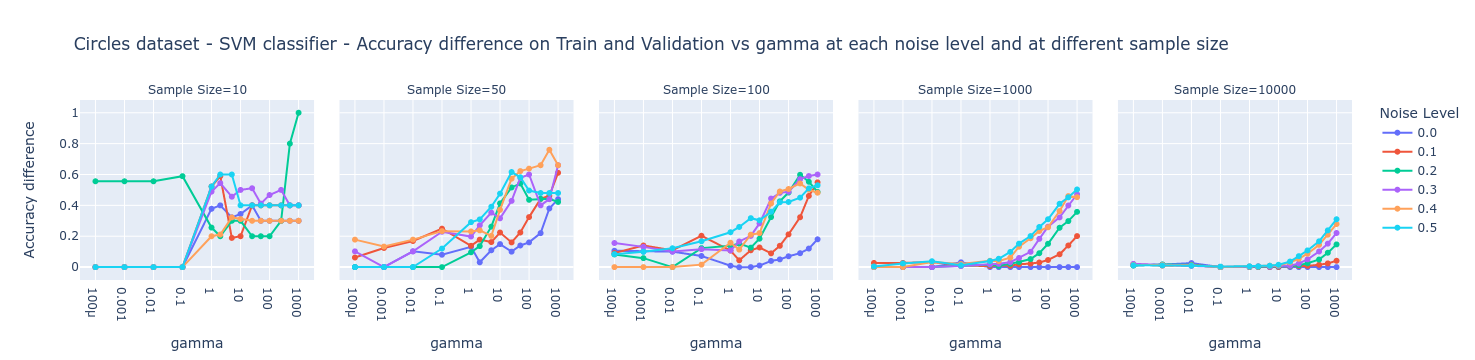

In [96]:
fig=px.line(df1_svm,x='gamma',y='acc_diff',
               labels={'noise_level':'Noise Level','n_sample': 'Sample Size','acc_diff':'Accuracy difference'},
               color='noise_level',facet_col='n_sample',markers=True,log_x=True,
               title='Circles dataset - SVM classifier - Accuracy difference on Train and Validation vs gamma at each noise level and at different sample size')
fig.update_xaxes(nticks=9)
fig.update_yaxes(nticks=6)
fig.show()

Beyond a certain gamma level (differnt for each noise level and sample size), the accuracy difference starting to rise.<br>
At higher noise level and higher gamma the SVM classifier starts to overfit the noise in the tarin data and the accuracy on the validation set satrt to drop.<br>
At a higher gamma level the overfitting increase at smaller sample size.



In [97]:
df1_svm=df1.query("clf_type=='svm' & C==1 & n_sample>=100").groupby(['n_sample','noise_level','gamma']).head()
df1_svm

dataset  n_sample  noise_level clf_type  acc_train  std_train  \
119   circles       100          0.0      svm      0.526      0.011   
120   circles       100          0.0      svm      0.531      0.024   
121   circles       100          0.0      svm      0.520      0.020   
122   circles       100          0.0      svm      0.532      0.017   
123   circles       100          0.0      svm      0.999      0.003   
...       ...       ...          ...      ...        ...        ...   
1451  circles     10000          0.5      svm      0.624      0.002   
1452  circles     10000          0.5      svm      0.652      0.003   
1453  circles     10000          0.5      svm      0.711      0.003   
1454  circles     10000          0.5      svm      0.768      0.001   
1455  circles     10000          0.5      svm      0.830      0.002   

      acc_valid  std_valid  acc_diff    C      gamma  
119       0.420      0.125     0.106  1.0     0.0001  
120       0.430      0.127     0.101  1.0     0.0010  
121       0.420      0.147     0.100  1.0     0.0100  
122       0.460      0.092     0.072  1.0     0.1000  
123       0.990      0.030     0.009  1.0     1.0000  
...         ...        ...       ...  ...        ...  
1451      0.553      0.010     0.071  1.0    50.0000  
1452      0.544      0.011     0.108  1.0   100.0000  
1453      0.544      0.016     0.167  1.0   250.0000  
1454      0.530      0.014     0.238  1.0   500.0000  
1455      0.520      0.020     0.310  1.0  1000.0000  

[252 rows x 11 columns]

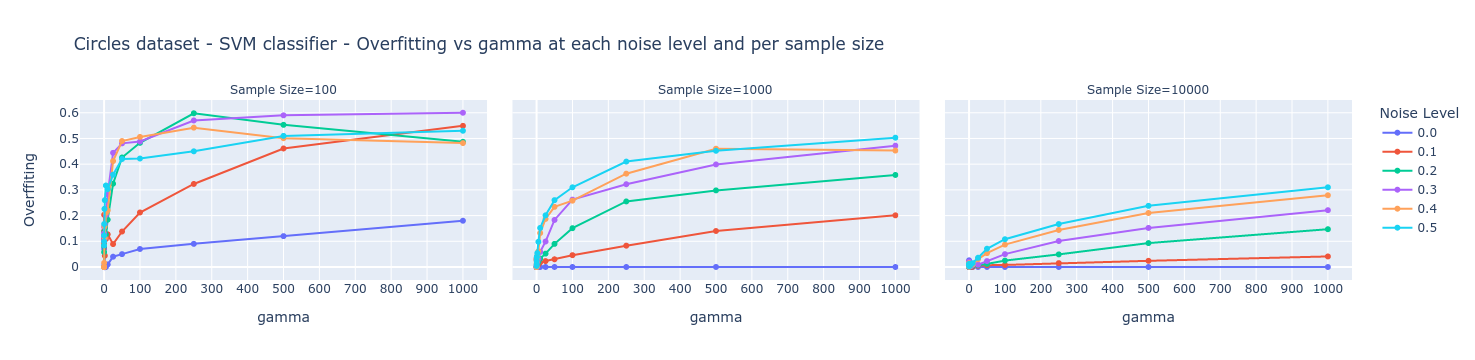

In [98]:
fig=px.line(df1_svm,x='gamma',y='acc_diff',
               labels={'noise_level':'Noise Level','n_sample': 'Sample Size','acc_diff':'Overffiting'},
               color='noise_level',facet_col='n_sample',markers=True,
               title='Circles dataset - SVM classifier - Overfitting vs gamma at each noise level and per sample size')
fig.update_xaxes(nticks=12)
fig.update_yaxes(nticks=8)
fig.show()

Gamma overfits the smaller dataset faster.

In [99]:
df1_svm=df1.query("clf_type=='svm' & n_sample==10000").groupby(['noise_level','gamma']).head()
df1_svm

dataset  n_sample  noise_level clf_type  acc_train  std_train  \
203   circles     10000          0.0      svm      0.501      0.001   
204   circles     10000          0.0      svm      0.501      0.001   
205   circles     10000          0.0      svm      0.502      0.001   
206   circles     10000          0.0      svm      0.730      0.194   
207   circles     10000          0.0      svm      1.000      0.000   
...       ...       ...          ...      ...        ...        ...   
1465  circles     10000          0.5      svm      0.654      0.002   
1466  circles     10000          0.5      svm      0.699      0.003   
1467  circles     10000          0.5      svm      0.784      0.002   
1468  circles     10000          0.5      svm      0.857      0.002   
1469  circles     10000          0.5      svm      0.926      0.001   

      acc_valid  std_valid  acc_diff     C      gamma  
203       0.489      0.007     0.012   0.1     0.0001  
204       0.490      0.006     0.011   0.1     0.0010  
205       0.486      0.005     0.016   0.1     0.0100  
206       0.712      0.202     0.018   0.1     0.1000  
207       1.000      0.000     0.000   0.1     1.0000  
...         ...        ...       ...   ...        ...  
1465      0.532      0.009     0.122  10.0    50.0000  
1466      0.530      0.019     0.169  10.0   100.0000  
1467      0.518      0.016     0.266  10.0   250.0000  
1468      0.514      0.016     0.343  10.0   500.0000  
1469      0.506      0.012     0.420  10.0  1000.0000  

[252 rows x 11 columns]

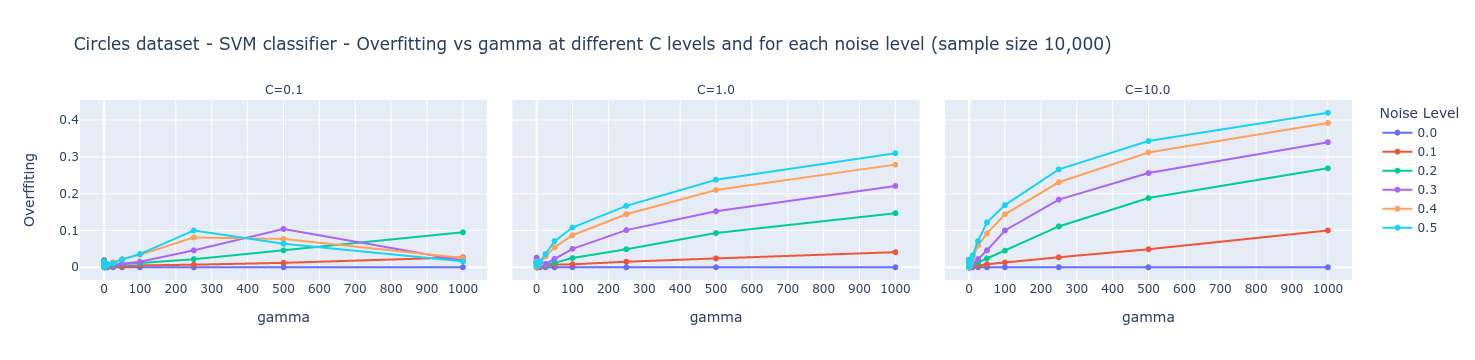

In [100]:
fig=px.line(df1_svm,x='gamma',y='acc_diff',
               labels={'noise_level':'Noise Level','acc_diff':'Overffiting'},
               color='noise_level',facet_col='C',markers=True,
               title='Circles dataset - SVM classifier - Overfitting vs gamma at different C levels and for each noise level (sample size 10,000)')
fig.update_xaxes(nticks=12)
fig.update_yaxes(nticks=5)
fig.show()

The l2 regularization C level also impacts the overfitting for each gamma level.<br>
Higher C values (lower L2 regularization) amplifies the overfitting for each gamma when the noise level rise.

* <b>Moons dataset</b>

In [119]:
df2_svm=df2.query("clf_type=='svm' & C==1").groupby(['n_sample','noise_level','gamma']).head()
df2_svm

dataset  n_sample  noise_level clf_type  acc_train  std_train  acc_valid  \
1491   moons        10          0.0      svm      0.600      0.054      0.600   
1492   moons        10          0.0      svm      0.600      0.054      0.600   
1493   moons        10          0.0      svm      0.600      0.054      0.600   
1494   moons        10          0.0      svm      0.844      0.151      0.500   
1495   moons        10          0.0      svm      1.000      0.000      1.000   
...      ...       ...          ...      ...        ...        ...        ...   
2921   moons     10000          0.5      svm      0.831      0.002      0.822   
2922   moons     10000          0.5      svm      0.836      0.001      0.816   
2923   moons     10000          0.5      svm      0.851      0.002      0.814   
2924   moons     10000          0.5      svm      0.869      0.001      0.800   
2925   moons     10000          0.5      svm      0.897      0.001      0.783   

      std_valid  acc_diff    C      gamma  
1491      0.490     0.000  1.0     0.0001  
1492      0.490     0.000  1.0     0.0010  
1493      0.490     0.000  1.0     0.0100  
1494      0.500     0.344  1.0     0.1000  
1495      0.000     0.000  1.0     1.0000  
...         ...       ...  ...        ...  
2921      0.012     0.009  1.0    50.0000  
2922      0.008     0.020  1.0   100.0000  
2923      0.015     0.037  1.0   250.0000  
2924      0.011     0.069  1.0   500.0000  
2925      0.013     0.114  1.0  1000.0000  

[420 rows x 11 columns]

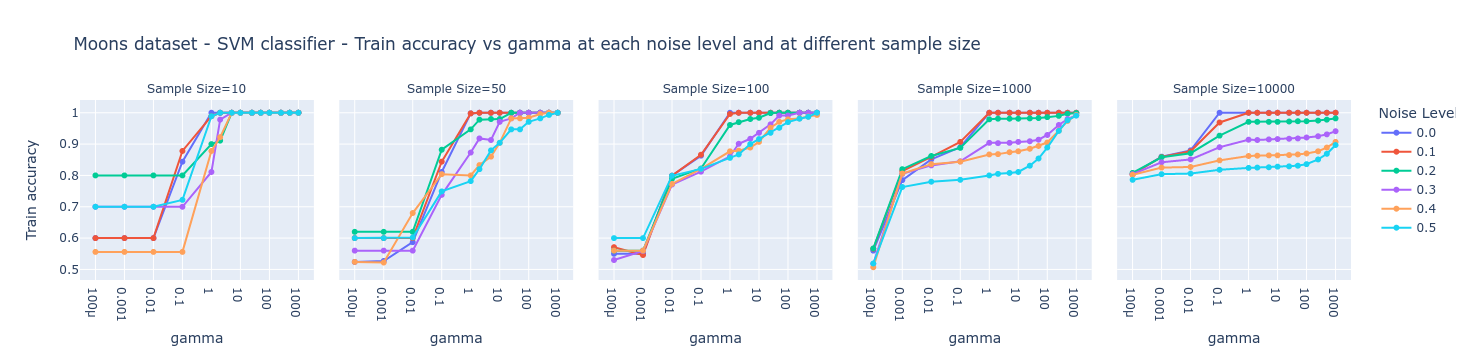

In [121]:
fig=px.line(df2_svm,x='gamma',y='acc_train',
               labels={'noise_level':'Noise Level','n_sample': 'Sample Size','acc_train':'Train accuracy'},
               color='noise_level',facet_col='n_sample',markers=True,log_x=True,
               title='Moons dataset - SVM classifier - Train accuracy vs gamma at each noise level and at different sample size')
fig.update_xaxes(nticks=9)
fig.update_yaxes(nticks=6)
fig.show()

Accuracy score on train set increase at higher gamma levels.<br>
For each noise level SVM fits the train set more accurate as gamma increases (higher complexity).<br>
Train accuracy and gamma are possitive correlated.

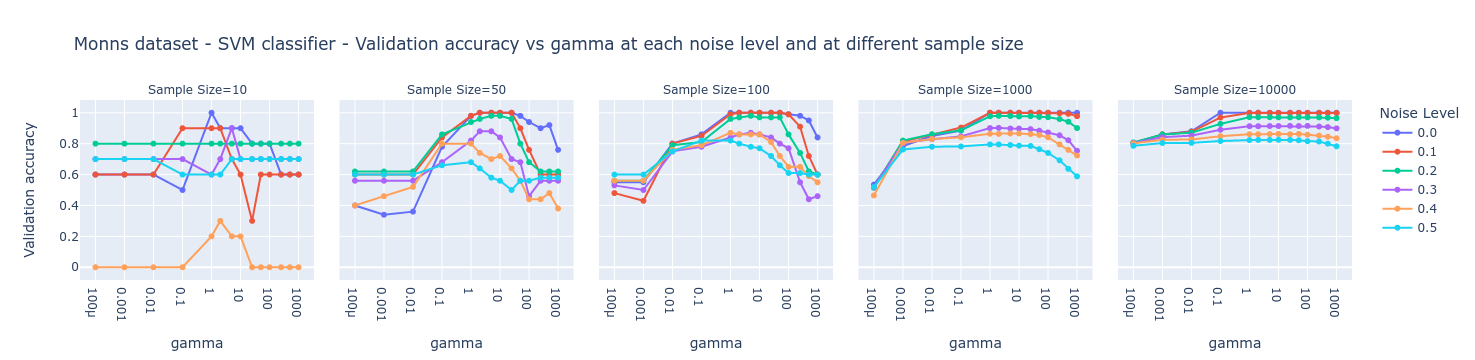

In [122]:
fig=px.line(df2_svm,x='gamma',y='acc_valid',
               labels={'noise_level':'Noise Level','n_sample': 'Sample Size','acc_valid':'Validation accuracy'},
               color='noise_level',facet_col='n_sample',markers=True,log_x=True,
               title='Monns dataset - SVM classifier - Validation accuracy vs gamma at each noise level and at different sample size')
fig.update_xaxes(nticks=9)
fig.update_yaxes(nticks=6)
fig.show()

Unlike the previous positive correlation between accuracy score on the train and gamma level, now we get more mixed picture.<br>
Gamma helps to improve the accuracy on the validation set till certain point. From this point on accuracy starts to decrease - sign to <b>overftting</b> on the train set.

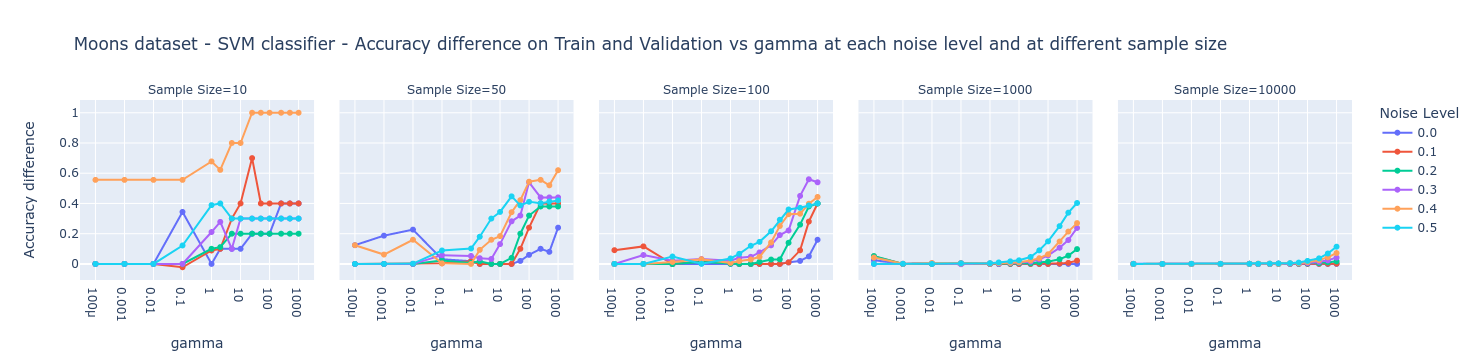

In [125]:
fig=px.line(df2_svm,x='gamma',y='acc_diff',
               labels={'noise_level':'Noise Level','n_sample': 'Sample Size','acc_diff':'Accuracy difference'},
               color='noise_level',facet_col='n_sample',markers=True,log_x=True,
               title='Moons dataset - SVM classifier - Accuracy difference on Train and Validation vs gamma at each noise level and at different sample size')
fig.update_xaxes(nticks=9)
fig.update_yaxes(nticks=6)
fig.show()

Beyond a certain gamma level (differnt for each noise level and sample size), the accuracy difference starting to rise.<br>
At higher noise level and higher gamma the SVM classifier starts to overfit the noise in the tarin data and the accuracy on the validation set satrt to drop.<br>
At a higher gamma level the overfitting increase at smaller sample size.



In [126]:
df2_svm=df2.query("clf_type=='svm' & C==1 & n_sample>=100").groupby(['n_sample','noise_level','gamma']).head()
df2_svm

dataset  n_sample  noise_level clf_type  acc_train  std_train  acc_valid  \
1589   moons       100          0.0      svm      0.550      0.015      0.550   
1590   moons       100          0.0      svm      0.550      0.011      0.550   
1591   moons       100          0.0      svm      0.799      0.020      0.800   
1592   moons       100          0.0      svm      0.863      0.014      0.860   
1593   moons       100          0.0      svm      1.000      0.000      1.000   
...      ...       ...          ...      ...        ...        ...        ...   
2921   moons     10000          0.5      svm      0.831      0.002      0.822   
2922   moons     10000          0.5      svm      0.836      0.001      0.816   
2923   moons     10000          0.5      svm      0.851      0.002      0.814   
2924   moons     10000          0.5      svm      0.869      0.001      0.800   
2925   moons     10000          0.5      svm      0.897      0.001      0.783   

      std_valid  acc_diff    C      gamma  
1589      0.136     0.000  1.0     0.0001  
1590      0.102     0.000  1.0     0.0010  
1591      0.077    -0.001  1.0     0.0100  
1592      0.092     0.003  1.0     0.1000  
1593      0.000     0.000  1.0     1.0000  
...         ...       ...  ...        ...  
2921      0.012     0.009  1.0    50.0000  
2922      0.008     0.020  1.0   100.0000  
2923      0.015     0.037  1.0   250.0000  
2924      0.011     0.069  1.0   500.0000  
2925      0.013     0.114  1.0  1000.0000  

[252 rows x 11 columns]

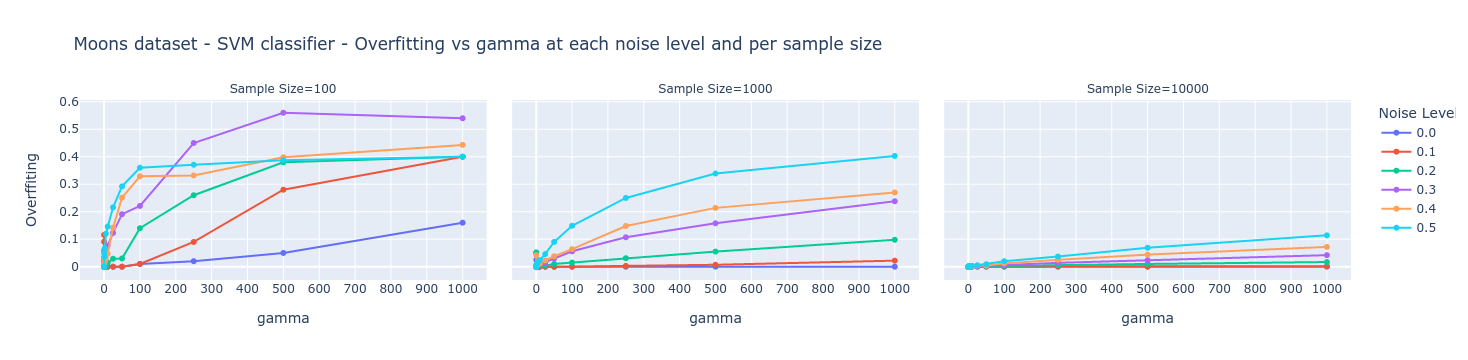

In [127]:
fig=px.line(df2_svm,x='gamma',y='acc_diff',
               labels={'noise_level':'Noise Level','n_sample': 'Sample Size','acc_diff':'Overffiting'},
               color='noise_level',facet_col='n_sample',markers=True,
               title='Moons dataset - SVM classifier - Overfitting vs gamma at each noise level and per sample size')
fig.update_xaxes(nticks=12)
fig.update_yaxes(nticks=7)
fig.show()

Large gamma overfits the smaller dataset faster.

In [128]:
df2_svm=df2.query("clf_type=='svm' & n_sample==10000").groupby(['noise_level','gamma']).head()
df2_svm

dataset  n_sample  noise_level clf_type  acc_train  std_train  acc_valid  \
1673   moons     10000          0.0      svm      0.530      0.087      0.517   
1674   moons     10000          0.0      svm      0.804      0.002      0.804   
1675   moons     10000          0.0      svm      0.859      0.001      0.859   
1676   moons     10000          0.0      svm      0.898      0.001      0.898   
1677   moons     10000          0.0      svm      1.000      0.000      1.000   
...      ...       ...          ...      ...        ...        ...        ...   
2935   moons     10000          0.5      svm      0.836      0.001      0.816   
2936   moons     10000          0.5      svm      0.849      0.002      0.814   
2937   moons     10000          0.5      svm      0.879      0.001      0.788   
2938   moons     10000          0.5      svm      0.915      0.001      0.759   
2939   moons     10000          0.5      svm      0.954      0.001      0.739   

      std_valid  acc_diff     C      gamma  
1673      0.083     0.013   0.1     0.0001  
1674      0.014     0.000   0.1     0.0010  
1675      0.014     0.000   0.1     0.0100  
1676      0.006     0.000   0.1     0.1000  
1677      0.000     0.000   0.1     1.0000  
...         ...       ...   ...        ...  
2935      0.007     0.020  10.0    50.0000  
2936      0.011     0.035  10.0   100.0000  
2937      0.014     0.091  10.0   250.0000  
2938      0.012     0.156  10.0   500.0000  
2939      0.014     0.215  10.0  1000.0000  

[252 rows x 11 columns]

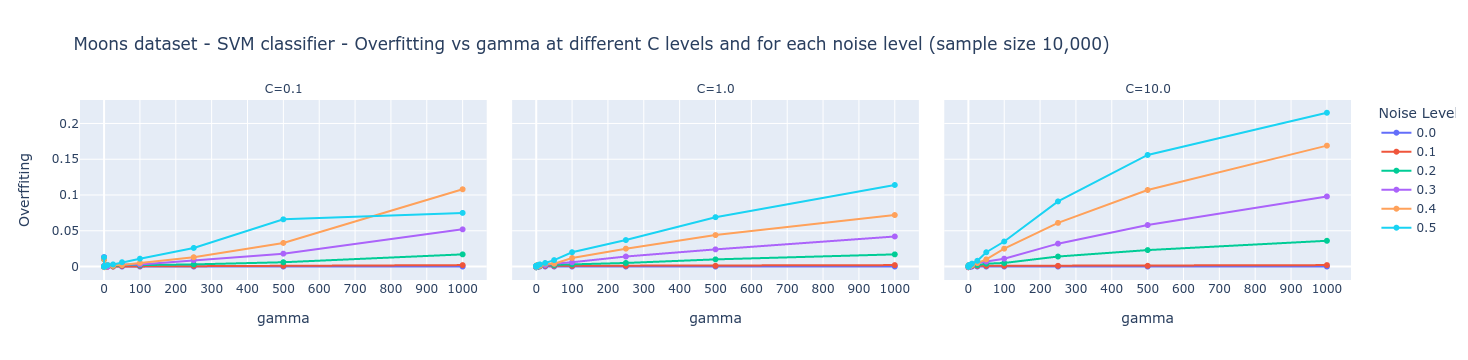

In [129]:
fig=px.line(df2_svm,x='gamma',y='acc_diff',
               labels={'noise_level':'Noise Level','acc_diff':'Overffiting'},
               color='noise_level',facet_col='C',markers=True,
               title='Moons dataset - SVM classifier - Overfitting vs gamma at different C levels and for each noise level (sample size 10,000)')
fig.update_xaxes(nticks=12)
fig.update_yaxes(nticks=6)
fig.show()

The l2 regularization C level also impacts the overfitting for each gamma level.<br>
Higher C amplifies the overfitting for each gamma when the noise level rise.

* are the noise level effect the number of datapoints needed to reach optimal test results

#### <b> (6) Noise level and the number of sample size needed to reach optimal test results </b>

##### <span style="color:red"><b>Linear classifier</b></span> 

* <b>Circles dataset</b>

In [130]:
df1_best_lm=df1.query("clf_type=='log_reg'").groupby(['n_sample','noise_level']).apply(lambda grp: grp.sort_values(by=['acc_valid','std_valid'],ascending=[False,True]).head(1))
df1_best_lm

dataset  n_sample  noise_level clf_type  acc_train  \
n_sample noise_level                                                            
10       0.0         0     circles        10          0.0  log_reg      0.700   
         0.1         245   circles        10          0.1  log_reg      0.600   
         0.2         494   circles        10          0.2  log_reg      0.878   
         0.3         735   circles        10          0.3  log_reg      0.600   
         0.4         984   circles        10          0.4  log_reg      0.889   
         0.5         1225  circles        10          0.5  log_reg      0.600   
50       0.0         50    circles        50          0.0  log_reg      0.540   
         0.1         296   circles        50          0.1  log_reg      0.538   
         0.2         539   circles        50          0.2  log_reg      0.580   
         0.3         785   circles        50          0.3  log_reg      0.533   
         0.4         1033  circles        50          0.4  log_reg      0.578   
         0.5         1274  circles        50          0.5  log_reg      0.540   
100      0.0         98    circles       100          0.0  log_reg      0.531   
         0.1         347   circles       100          0.1  log_reg      0.532   
         0.2         594   circles       100          0.2  log_reg      0.582   
         0.3         837   circles       100          0.3  log_reg      0.537   
         0.4         1084  circles       100          0.4  log_reg      0.597   
         0.5         1323  circles       100          0.5  log_reg      0.530   
1000     0.0         147   circles      1000          0.0  log_reg      0.518   
         0.1         395   circles      1000          0.1  log_reg      0.537   
         0.2         639   circles      1000          0.2  log_reg      0.496   
         0.3         888   circles      1000          0.3  log_reg      0.546   
         0.4         1130  circles      1000          0.4  log_reg      0.534   
         0.5         1374  circles      1000          0.5  log_reg      0.535   
10000    0.0         201   circles     10000          0.0  log_reg      0.519   
         0.1         442   circles     10000          0.1  log_reg      0.513   
         0.2         690   circles     10000          0.2  log_reg      0.502   
         0.3         934   circles     10000          0.3  log_reg      0.503   
         0.4         1178  circles     10000          0.4  log_reg      0.502   
         0.5         1423  circles     10000          0.5  log_reg      0.504   

                           std_train  acc_valid  std_valid  acc_diff  \
n_sample noise_level                                                   
10       0.0         0         0.051      0.700      0.458     0.000   
         0.1         245       0.054      0.600      0.490     0.000   
         0.2         494       0.078      0.700      0.458     0.178   
         0.3         735       0.054      0.600      0.490     0.000   
         0.4         984       0.050      0.800      0.400     0.089   
         0.5         1225      0.054      0.600      0.490     0.000   
50       0.0         50        0.017      0.540      0.156     0.000   
         0.1         296       0.049      0.360      0.150     0.178   
         0.2         539       0.021      0.580      0.189     0.000   
         0.3         785       0.031      0.540      0.128    -0.007   
         0.4         1033      0.046      0.500      0.224     0.078   
         0.5         1274      0.020      0.540      0.180     0.000   
100      0.0         98        0.013      0.470      0.119     0.061   
         0.1         347       0.025      0.490      0.122     0.042   
         0.2         594       0.027      0.560      0.162     0.022   
         0.3         837       0.040      0.440      0.229     0.097   
         0.4         1084      0.024      0.550      0.128     0.047   
         0.5         1323      0.014      0.490      0.070     0.0

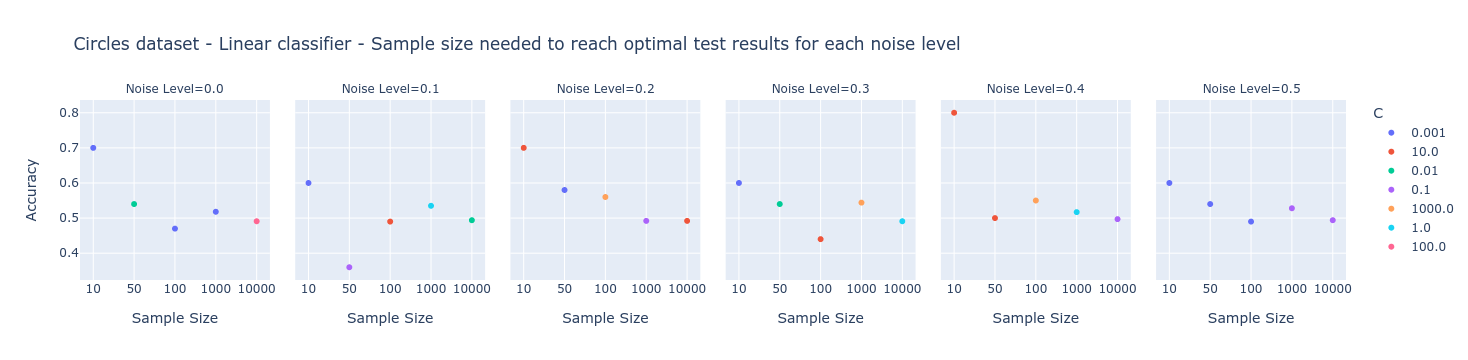

In [131]:
df1_best_lm.C = df1_best_lm.C.astype(str)
df1_best_lm.n_sample = df1_best_lm.n_sample.astype(str)

fig=px.scatter(df1_best_lm,x='n_sample',y='acc_valid',
               labels={'n_sample': 'Sample Size', 'acc_valid':'Accuracy', 'noise_level':'Noise Level'},
               color='C',facet_col='noise_level',
               title='Circles dataset - Linear classifier - Sample size needed to reach optimal test results for each noise level')
fig.update_xaxes(categoryorder='array', categoryarray= ['10','50','100','1000','10000'])
fig.show()

In [132]:
df2_best_lm=df2.query("clf_type=='log_reg'").groupby(['n_sample','noise_level']).apply(lambda grp: grp.sort_values(by=['acc_valid','std_valid'],ascending=[False,True]).head(1))
df2_best_lm

dataset  n_sample  noise_level clf_type  acc_train  \
n_sample noise_level                                                           
10       0.0         1473   moons        10          0.0  log_reg      1.000   
         0.1         1718   moons        10          0.1  log_reg      0.900   
         0.2         1960   moons        10          0.2  log_reg      0.800   
         0.3         2205   moons        10          0.3  log_reg      0.700   
         0.4         2453   moons        10          0.4  log_reg      0.633   
         0.5         2699   moons        10          0.5  log_reg      0.844   
50       0.0         1524   moons        50          0.0  log_reg      0.862   
         0.1         1769   moons        50          0.1  log_reg      0.911   
         0.2         2013   moons        50          0.2  log_reg      0.869   
         0.3         2256   moons        50          0.3  log_reg      0.764   
         0.4         2501   moons        50          0.4  log_reg      0.793   
         0.5         2747   moons        50          0.5  log_reg      0.760   
100      0.0         1572   moons       100          0.0  log_reg      0.903   
         0.1         1819   moons       100          0.1  log_reg      0.896   
         0.2         2062   moons       100          0.2  log_reg      0.848   
         0.3         2306   moons       100          0.3  log_reg      0.770   
         0.4         2553   moons       100          0.4  log_reg      0.831   
         0.5         2796   moons       100          0.5  log_reg      0.821   
1000     0.0         1623   moons      1000          0.0  log_reg      0.881   
         0.1         1867   moons      1000          0.1  log_reg      0.899   
         0.2         2113   moons      1000          0.2  log_reg      0.876   
         0.3         2356   moons      1000          0.3  log_reg      0.832   
         0.4         2599   moons      1000          0.4  log_reg      0.839   
         0.5         2848   moons      1000          0.5  log_reg      0.785   
10000    0.0         1670   moons     10000          0.0  log_reg      0.894   
         0.1         1914   moons     10000          0.1  log_reg      0.881   
         0.2         2158   moons     10000          0.2  log_reg      0.873   
         0.3         2406   moons     10000          0.3  log_reg      0.853   
         0.4         2651   moons     10000          0.4  log_reg      0.828   
         0.5         2893   moons     10000          0.5  log_reg      0.806   

                           std_train  acc_valid  std_valid  acc_diff  \
n_sample noise_level                                                   
10       0.0         1473      0.000      1.000      0.000     0.000   
         0.1         1718      0.033      0.900      0.300     0.000   
         0.2         1960      0.044      0.800      0.400     0.000   
         0.3         2205      0.051      0.700      0.458     0.000   
         0.4         2453      0.141      0.300      0.458     0.333   
         0.5         2699      0.089      0.800      0.400     0.044   
50       0.0         1524      0.019      0.860      0.156     0.002   
         0.1         1769      0.017      0.860      0.092     0.051   
         0.2         2013      0.021      0.880      0.133    -0.011   
         0.3         2256      0.037      0.760      0.150     0.004   
         0.4         2501      0.033      0.820      0.140    -0.027   
         0.5         2747      0.022      0.760      0.120     0.000   
100      0.0         1572      0.012      0.890      0.083     0.013   
         0.1         1819      0.016      0.890      0.070     0.006   
         0.2         2062      0.012      0.830      0.100     0.018   
         0.3         2306      0.016      0.780      0.098    -0.010   
         0.4         2553      0.008      0.830      0.064     0.001   
         0.5         2796      0.019      0.820      0.154     0.001   
1000     0.0         1623

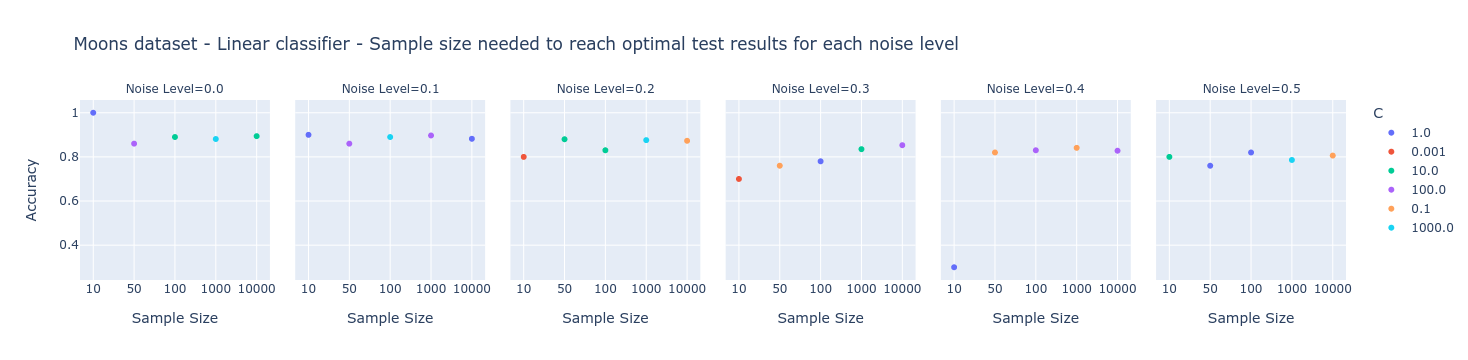

In [133]:
df2_best_lm.C = df2_best_lm.C.astype(str)
df2_best_lm.n_sample = df2_best_lm.n_sample.astype(str)

fig=px.scatter(df2_best_lm,x='n_sample',y='acc_valid',
               labels={'n_sample': 'Sample Size', 'acc_valid':'Accuracy', 'noise_level':'Noise Level'},
               color='C',facet_col='noise_level',
               title='Moons dataset - Linear classifier - Sample size needed to reach optimal test results for each noise level')
fig.update_xaxes(categoryorder='array', categoryarray= ['10','50','100','1000','10000'])
fig.show()

For the moons dataset and for each noise level the linear classifier achieves similar predicted accuracy on validation set on different sample size.
this is indication that the linear classifier makes good separation between the calsses (gets the pattern in the data) 

##### <span style="color:red"><b>SVM classifier</b></span>

* <b> Circles dataset</b>

In [134]:
df1_best_svm=df1.query("clf_type=='svm'").groupby(['n_sample','noise_level']).apply(lambda grp: grp.sort_values(by=['acc_valid','std_valid'],ascending=[False,True]).head(1))
df1_best_svm

dataset  n_sample  noise_level clf_type  acc_train  \
n_sample noise_level                                                            
10       0.0         7     circles        10          0.0      svm      0.700   
         0.1         286   circles        10          0.1      svm      1.000   
         0.2         516   circles        10          0.2      svm      1.000   
         0.3         742   circles        10          0.3      svm      0.600   
         0.4         1019  circles        10          0.4      svm      0.911   
         0.5         1232  circles        10          0.5      svm      0.600   
50       0.0         88    circles        50          0.0      svm      1.000   
         0.1         334   circles        50          0.1      svm      0.936   
         0.2         550   circles        50          0.2      svm      0.580   
         0.3         824   circles        50          0.3      svm      0.831   
         0.4         1056  circles        50          0.4      svm      0.782   
         0.5         1296  circles        50          0.5      svm      0.540   
100      0.0         124   circles       100          0.0      svm      0.999   
         0.1         372   circles       100          0.1      svm      0.939   
         0.2         628   circles       100          0.2      svm      0.776   
         0.3         874   circles       100          0.3      svm      0.831   
         0.4         1117  circles       100          0.4      svm      0.710   
         0.5         1368  circles       100          0.5      svm      1.000   
1000     0.0         158   circles      1000          0.0      svm      1.000   
         0.1         431   circles      1000          0.1      svm      0.861   
         0.2         676   circles      1000          0.2      svm      0.705   
         0.3         920   circles      1000          0.3      svm      0.633   
         0.4         1165  circles      1000          0.4      svm      0.601   
         0.5         1396  circles      1000          0.5      svm      0.566   
10000    0.0         207   circles     10000          0.0      svm      1.000   
         0.1         481   circles     10000          0.1      svm      0.844   
         0.2         711   circles     10000          0.2      svm      0.691   
         0.3         943   circles     10000          0.3      svm      0.637   
         0.4         1216  circles     10000          0.4      svm      0.593   
         0.5         1461  circles     10000          0.5      svm      0.583   

                           std_train  acc_valid  std_valid  acc_diff     C  \
n_sample noise_level                                                         
10       0.0         7         0.051      0.700      0.458     0.000   0.1   
         0.1         286       0.000      0.900      0.300     0.100  10.0   
         0.2         516       0.000      0.800      0.400     0.200   1.0   
         0.3         742       0.054      0.600      0.490     0.000   0.1   
         0.4         1019      0.044      0.800      0.400     0.111  10.0   
         0.5         1232      0.054      0.600      0.490     0.000   0.1   
50       0.0         88        0.000      1.000      0.000     0.000  10.0   
         0.1         334       0.016      0.840      0.120     0.096  10.0   
         0.2         550       0.016      0.580      0.140     0.000   0.1   
         0.3         824       0.020      0.620      0.140     0.211  10.0   
         0.4         1056      0.024      0.580      0.189     0.202   1.0   
         0.5         1296      0.010      0.540      0.092     0.000   1.0   
100      0.0         124       0.003      1.000      0.000    -0.001   1.0   
         0.1         372       0.010      0.850      0.120     0.089   1.0   
         0.2         628       0.033      0.630      0.135     0.146  10.0   
         0.3         874       0.026      0.580      0.117     0.251  10.0   
         0.4         1117     

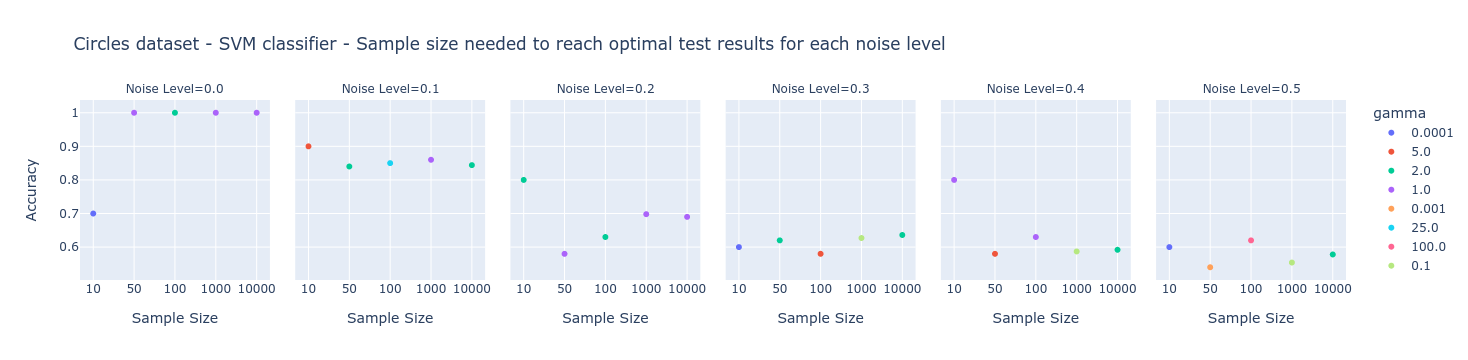

In [135]:
df1_best_svm.gamma = df1_best_svm.gamma.astype(str)
df1_best_svm.n_sample = df1_best_svm.n_sample.astype(str)

fig=px.scatter(df1_best_svm,x='n_sample',y='acc_valid',
               labels={'n_sample': 'Sample Size', 'acc_valid':'Accuracy', 'noise_level':'Noise Level'},
               color='gamma',facet_col='noise_level',
               title='Circles dataset - SVM classifier - Sample size needed to reach optimal test results for each noise level')
fig.update_xaxes(categoryorder='array', categoryarray= ['10','50','100','1000','10000'])
fig.show()

* <b>Moons dataset<b/>

In [136]:
df2_best_svm=df2.query("clf_type=='svm'").groupby(['n_sample','noise_level']).apply(lambda grp: grp.sort_values(by=['acc_valid','std_valid'],ascending=[False,True]).head(1))
df2_best_svm

dataset  n_sample  noise_level clf_type  acc_train  \
n_sample noise_level                                                           
10       0.0         1495   moons        10          0.0      svm      1.000   
         0.1         1739   moons        10          0.1      svm      0.878   
         0.2         1967   moons        10          0.2      svm      0.800   
         0.3         2232   moons        10          0.3      svm      1.000   
         0.4         2489   moons        10          0.4      svm      0.956   
         0.5         2734   moons        10          0.5      svm      1.000   
50       0.0         1545   moons        50          0.0      svm      1.000   
         0.1         1790   moons        50          0.1      svm      1.000   
         0.2         2036   moons        50          0.2      svm      0.980   
         0.3         2280   moons        50          0.3      svm      0.918   
         0.4         2537   moons        50          0.4      svm      0.807   
         0.5         2769   moons        50          0.5      svm      0.782   
100      0.0         1593   moons       100          0.0      svm      1.000   
         0.1         1839   moons       100          0.1      svm      1.000   
         0.2         2100   moons       100          0.2      svm      1.000   
         0.3         2344   moons       100          0.3      svm      0.944   
         0.4         2587   moons       100          0.4      svm      0.873   
         0.5         2830   moons       100          0.5      svm      0.827   
1000     0.0         1628   moons      1000          0.0      svm      1.000   
         0.1         1875   moons      1000          0.1      svm      1.000   
         0.2         2133   moons      1000          0.2      svm      0.981   
         0.3         2366   moons      1000          0.3      svm      0.904   
         0.4         2639   moons      1000          0.4      svm      0.884   
         0.5         2855   moons      1000          0.5      svm      0.804   
10000    0.0         1677   moons     10000          0.0      svm      1.000   
         0.1         1951   moons     10000          0.1      svm      1.000   
         0.2         2195   moons     10000          0.2      svm      0.972   
         0.3         2432   moons     10000          0.3      svm      0.921   
         0.4         2676   moons     10000          0.4      svm      0.867   
         0.5         2919   moons     10000          0.5      svm      0.828   

                           std_train  acc_valid  std_valid  acc_diff     C  \
n_sample noise_level                                                         
10       0.0         1495      0.000      1.000      0.000     0.000   1.0   
         0.1         1739      0.060      0.900      0.300    -0.022   1.0   
         0.2         1967      0.044      0.800      0.400     0.000   0.1   
         0.3         2232      0.000      0.900      0.300     0.100   1.0   
         0.4         2489      0.054      0.500      0.500     0.456  10.0   
         0.5         2734      0.000      0.900      0.300     0.100  10.0   
50       0.0         1545      0.000      1.000      0.000     0.000   1.0   
         0.1         1790      0.000      1.000      0.000     0.000   1.0   
         0.2         2036      0.007      0.980      0.060     0.000   1.0   
         0.3         2280      0.024      0.880      0.133     0.038   1.0   
         0.4         2537      0.028      0.820      0.189    -0.013  10.0   
         0.5         2769      0.031      0.680      0.133     0.102   1.0   
100      0.0         1593      0.000      1.000      0.000     0.000   1.0   
         0.1         1839      0.000      1.000      0.000     0.000   1.0   
         0.2         2100      0.000      0.990      0.030     0.010  10.0   
         0.3         2344      0.009      0.880      0.098     0.064  10.0   
         0.4         2587      0.009      0.880      0.060   

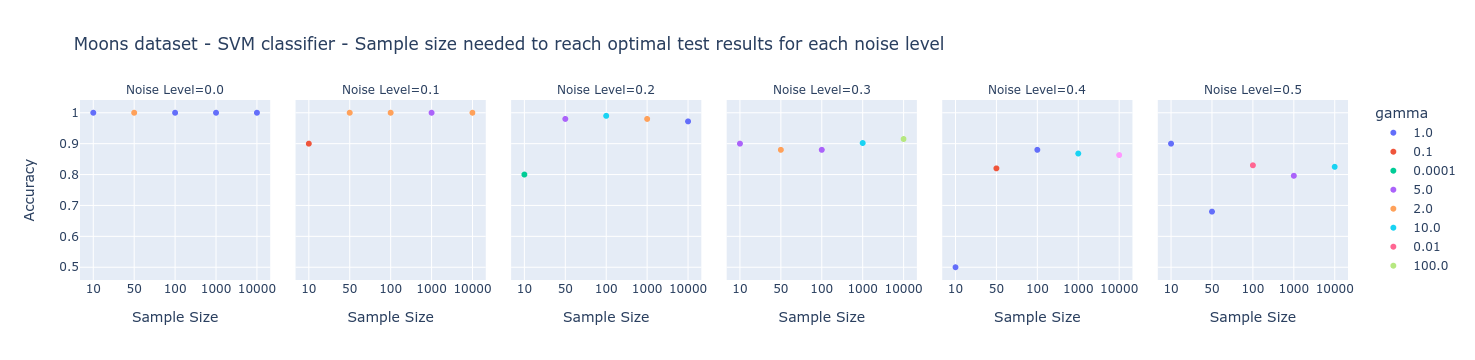

In [138]:
df2_best_svm.gamma = df2_best_svm.gamma.astype(str)
df2_best_svm.n_sample = df2_best_svm.n_sample.astype(str)

fig=px.scatter(df2_best_svm,x='n_sample',y='acc_valid',
               labels={'n_sample': 'Sample Size', 'acc_valid':'Accuracy', 'noise_level':'Noise Level'},
               color='gamma',facet_col='noise_level',
               title='Moons dataset - SVM classifier - Sample size needed to reach optimal test results for each noise level')
fig.update_xaxes(categoryorder='array', categoryarray= ['10','50','100','1000','10000'])
fig.update_yaxes(nticks=6)
fig.show()

For both datasets and in general, for each noise level in the dataset, SVM classifier gives similar optimal predicted accuracy on the validation set on different sample size.<br>
The accuracy of the classifier affected by the noise level in the data and not from the sample size, as long it is not really small.<br>
The hyper params (gamma) get tuned for each sample size and noise level and at best gives similar predicted accuracy for the noise level bucket.<br>
In other word, the <b>tuned SVM classifier correctly perceives the pattern in the data and gives the best prediction accuracy depending on the statistical noise level.<b> 

#### <b>(7) Visualization decision boundary of the classifiers</b>

* setup for both datasets w/ noise level of 0.2 and sample size of 1000

In [35]:
noise_level=0.2
sample_size=1000

mask1=((dataset.dataset_name=='circles') & (dataset.noise_level==noise_level))
mask2=((dataset.dataset_name=='moons') & (dataset.noise_level==noise_level))
df_circles=dataset[mask1].head(sample_size)
df_moons=dataset[mask2].head(sample_size)

* Circles dataset
    * Tune SVM hyper parms for most accuracy score on validation set

In [188]:
df1.query("clf_type=='svm' & n_sample==1000").groupby('noise_level').apply(lambda grp: grp.sort_values(by=['acc_valid','acc_diff','std_valid'],ascending=[False,True,True]).head(1))

dataset  n_sample  noise_level clf_type  acc_train  \
noise_level                                                            
0.0         158   circles      1000          0.0      svm      1.000   
0.1         431   circles      1000          0.1      svm      0.861   
0.2         676   circles      1000          0.2      svm      0.705   
0.3         920   circles      1000          0.3      svm      0.633   
0.4         1165  circles      1000          0.4      svm      0.601   
0.5         1396  circles      1000          0.5      svm      0.566   

                  std_train  acc_valid  std_valid  acc_diff     C  gamma  
noise_level                                                               
0.0         158       0.000      1.000      0.000     0.000   0.1    1.0  
0.1         431       0.005      0.860      0.032     0.001  10.0    1.0  
0.2         676       0.005      0.698      0.039     0.007  10.0    1.0  
0.3         920       0.006      0.627      0.037     0.006  10.0    0.1  
0.4         1165      0.006      0.587      0.040     0.014  10.0    0.1  
0.5         1396      0.006      0.554      0.033     0.012   1.0    0.1

In [ ]:
from src.visualization import make_meshgrid, make_decision_boundary_plot

# set-up data
dataset_name='Circles'
X=df_circles.iloc[:,2:-1].to_numpy()
y=df_circles.iloc[:,-1:].label.map({'A':0,'B':1}).to_numpy()

# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
x_grid=xx.reshape(-1)
y_grid=yy.reshape(-1)

# set-up classifier 
C=10
gamma=1
model = SVC(kernel='rbf',C=C,gamma=gamma)
clf_fit = model.fit(X, y)

# plot
title = f'{dataset_name} - SVM decision boundary w/ RBF kernal (C={C},gamma={gamma}) - noise level:{noise_level}  sample size:{X.shape[0]}'
fig=make_decision_boundary_plot(clf_fit,X0,X1,y,x_grid,y_grid,title)
fig.show()

* Tune SVM hyper parms for most stable model

In [190]:
df1.query("clf_type=='svm' & n_sample==1000").groupby('noise_level').apply(lambda grp: grp.sort_values(by=['acc_diff','std_valid','acc_valid'],ascending=[True,True,False]).head(1))

dataset  n_sample  noise_level clf_type  acc_train  \
noise_level                                                            
0.0         158   circles      1000          0.0      svm      1.000   
0.1         427   circles      1000          0.1      svm      0.509   
0.2         659   circles      1000          0.2      svm      0.516   
0.3         899   circles      1000          0.3      svm      0.518   
0.4         1134  circles      1000          0.4      svm      0.512   
0.5         1389  circles      1000          0.5      svm      0.506   

                  std_train  acc_valid  std_valid  acc_diff     C     gamma  
noise_level                                                                  
0.0         158       0.000      1.000      0.000       0.0   0.1    1.0000  
0.1         427       0.004      0.509      0.039       0.0  10.0    0.0001  
0.2         659       0.004      0.516      0.032       0.0   1.0    0.0010  
0.3         899       0.004      0.518      0.035       0.0   0.1  100.0000  
0.4         1134      0.003      0.512      0.024       0.0   0.1    0.0001  
0.5         1389      0.003      0.506      0.023       0.0   0.1  100.0000

In [37]:
# set-up data
dataset_name='Circles'
X=df_circles.iloc[:,2:-1].to_numpy()
y=df_circles.iloc[:,-1:].label.map({'A':0,'B':1}).to_numpy()

# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
x_grid=xx.reshape(-1)
y_grid=yy.reshape(-1)

# set-up classifier 
C=1
gamma=0.001
model = SVC(kernel='rbf',C=C,gamma=gamma)
clf_fit = model.fit(X, y)

# plot
title = f'{dataset_name} - SVM decision boundary w/ RBF kernal (C={C},gamma={gamma}) - noise level:{noise_level}  sample size:{X.shape[0]}'
fig=make_decision_boundary_plot(clf_fit,X0,X1,y,x_grid,y_grid,title)
fig.show()

* No boundary decision for most stable model w/ 50% accuracy

* overfitting example

In [38]:
dataset_name='Circles'
X=df_circles.iloc[:,2:-1].to_numpy()
y=df_circles.iloc[:,-1:].label.map({'A':0,'B':1}).to_numpy()

# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
x_grid=xx.reshape(-1)
y_grid=yy.reshape(-1)

# set-up classifier 
C=10
gamma=50
model = SVC(kernel='rbf',C=C,gamma=gamma)
clf_fit = model.fit(X, y)

# plot
title = f'{dataset_name} - SVM decision boundary w/ RBF kernal (C={C},gamma={gamma}) - noise level:{noise_level}  sample size:{X.shape[0]}'
fig=make_decision_boundary_plot(clf_fit,X0,X1,y,x_grid,y_grid,title)
fig.show()

* The model start to classify the noize in the data

* Moons dataset
    * Tune hyper parms for most accuracy score on validation set

In [194]:
df2.query("clf_type=='svm' & n_sample==1000").groupby('noise_level').apply(lambda grp: grp.sort_values(by=['acc_valid','acc_diff','std_valid'],ascending=[False,True,True]).head(1))

dataset  n_sample  noise_level clf_type  acc_train  \
noise_level                                                           
0.0         1628   moons      1000          0.0      svm      1.000   
0.1         1875   moons      1000          0.1      svm      1.000   
0.2         2133   moons      1000          0.2      svm      0.981   
0.3         2378   moons      1000          0.3      svm      0.903   
0.4         2639   moons      1000          0.4      svm      0.884   
0.5         2855   moons      1000          0.5      svm      0.804   

                  std_train  acc_valid  std_valid  acc_diff     C  gamma  
noise_level                                                               
0.0         1628      0.000      1.000      0.000     0.000   0.1    1.0  
0.1         1875      0.000      1.000      0.000     0.000   0.1    5.0  
0.2         2133      0.001      0.980      0.010     0.001   1.0    2.0  
0.3         2378      0.004      0.902      0.027     0.001   1.0    2.0  
0.4         2639      0.004      0.868      0.027     0.016  10.0   10.0  
0.5         2855      0.005      0.796      0.042     0.008   0.1    5.0

In [39]:
# set-up data
dataset_name='Monns'
X=df_moons.iloc[:,2:-1].to_numpy()
y=df_moons.iloc[:,-1:].label.map({'A':0,'B':1}).to_numpy()

# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
x_grid=xx.reshape(-1)
y_grid=yy.reshape(-1)

# set-up classifier 
C=1
gamma=2
model = SVC(kernel='rbf',C=C,gamma=gamma)
clf_fit = model.fit(X, y)

# plot
title = f'{dataset_name} - SVM decision boundary w/ RBF kernal (C={C},gamma={gamma}) - noise level:{noise_level}  sample size:{X.shape[0]}'
fig=make_decision_boundary_plot(clf_fit,X0,X1,y,x_grid,y_grid,title)
fig.show()


* Moons dataset
    * Tune L2 regularization C value for linear classifier (logistic Regression)

In [196]:
df2.query("clf_type=='log_reg' & n_sample==1000").groupby('noise_level').apply(lambda grp: grp.sort_values(by=['acc_valid','acc_diff','std_valid'],ascending=[False,True,True]).head(1))

dataset  n_sample  noise_level clf_type  acc_train  \
noise_level                                                           
0.0         1623   moons      1000          0.0  log_reg      0.881   
0.1         1867   moons      1000          0.1  log_reg      0.899   
0.2         2113   moons      1000          0.2  log_reg      0.876   
0.3         2356   moons      1000          0.3  log_reg      0.832   
0.4         2599   moons      1000          0.4  log_reg      0.839   
0.5         2848   moons      1000          0.5  log_reg      0.785   

                  std_train  acc_valid  std_valid  acc_diff       C  gamma  
noise_level                                                                 
0.0         1623      0.003      0.881      0.030     0.000  1000.0    0.0  
0.1         1867      0.003      0.897      0.022     0.002   100.0    0.0  
0.2         2113      0.003      0.876      0.029     0.000  1000.0    0.0  
0.3         2356      0.004      0.835      0.028    -0.003    10.0    0.0  
0.4         2599      0.005      0.841      0.034    -0.002     0.1    0.0  
0.5         2848      0.006      0.786      0.042    -0.001  1000.0    0.0

In [40]:
# set-up data
dataset_name='Monns'
X=df_moons.iloc[:,2:-1].to_numpy()
y=df_moons.iloc[:,-1:].label.map({'A':0,'B':1}).to_numpy()

# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
x_grid=xx.reshape(-1)
y_grid=yy.reshape(-1)

# set-up classifier 
C=1000
model = LogisticRegression(penalty='l2', C=C)
clf_fit = model.fit(X, y)

# plot
title = f'{dataset_name} - Logistic Regression decision boundary (L2,C={C}) - noise level:{noise_level}  sample size:{X.shape[0]}'
fig=make_decision_boundary_plot(clf_fit,X0,X1,y,x_grid,y_grid,title)
fig.show()


In [ ]:
datasets_type = ['circles', 'moons']
k_folds = 10
n_samples = [10, 50, 100, 1000, 10000]
noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
clf_types = ['log_reg', 'svm']
hp_range = <'Your hyper parameters ranges here'>
regularization_values = <'Your regularization values here'>
results = []
for ds_type in datasets_type:
    print(f'Working on {ds_type}')
    for nl in noise_levels:
        for n in n_samples:
            ds = datasets.query(<'your query here'>).head(n)
            print(f'Starting {k_folds}-fold cross validation for {ds_type} datasets with {n} samples and noise level {nl}. Going to train {clf_types} classifiers.')
            for k in range(k_folds):
                X, Y = <'Your code here'>
                x_train,x_test,y_train,y_test= <'Your code here'>
                for clf_type in clf_types:
                    if clf_type == 'log_reg':
                        for regularization_value in regularization_values:
                            train_acc, test_acc = <'Your code here'>
                            results.append(<'Your code here'>)
                    if clf_type == 'svm':
                        for gamma in hp_range:
                            train_acc, test_acc = <'Your code here'>
                            results.append(<'Your code here'>)

### Question 1 - Manual Classification

The purpose of this excercise is to examplify the need in a fitting algorithm. We will do so by trying to find only 2 models parameters by ourselves. 

In [ ]:
slope, intercept = 2.5, 6

In [ ]:
x_1, x_2 = 0.2, 0.6
on_line = [[x, x*slope + intercept,'on_line'] for x in np.linspace(-1,2,100)]

above_line = [[x_1, x_1*slope + intercept + 2, 'Above'], 
              [x_2, x_2*slope + intercept + 2, 'Above']] 

below_line = [[x_1, x_1*slope + intercept - 2, 'Below'], 
              [x_2, x_2*slope + intercept - 2, 'Below']] 

In [ ]:
columns = ['x','y','label']
data = pd.DataFrame(on_line + above_line + below_line, columns = columns)

In [ ]:
px.scatter(data, x='x', y='y', color = 'label')